In [1]:
import os
import subprocess

import tensorflow as tf
import keras
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

# import torch
# from torch import nn
# import math
# from torch import optim

import pandas as pd
import numpy as np
import h5py

import matplotlib.pyplot as plt

2025-05-16 10:53:15.505130: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 10:53:15.505634: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 10:53:15.507598: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 10:53:15.513047: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747403595.521800   15396 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747403595.52

# Training

In [2]:
location = "."
neos = 4000
f = h5py.File(f"{location}/nndata_sly.h5", "r")
# f = h5py.File(f"{location}/nndata_ska.h5", "r")
data = np.array(f["data"][:,0:neos*100])
f.close()

data = data.T
print(data.shape)

datasize = data.shape[0]
traindiv = 0.95
trainsize = int(traindiv*datasize)
print(trainsize)

x_train = data[0:trainsize,0:56]
y_train = data[0:trainsize,56:61]
# x_train = data[0:trainsize,0:28]
# y_train = data[0:trainsize,56:61]

x_test = data[trainsize:datasize,0:56]
y_test = data[trainsize:datasize,56:61]
# x_test = data[trainsize:datasize,0:28]
# y_test = data[trainsize:datasize,56:61]

print(f"x train size: {x_train.shape},   y train size: {y_train.shape}")
print(f"x test size: {x_test.shape},   y test size: {y_test.shape}")

x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_test_tensor = tf.convert_to_tensor(x_test)
y_test_tensor = tf.convert_to_tensor(y_test)

(400000, 61)
380000
x train size: (380000, 56),   y train size: (380000, 5)
x test size: (20000, 56),   y test size: (20000, 5)


2025-05-16 10:53:40.538691: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
mrdata = h5py.File(f"{location}/mrdiagram_sly.h5", "r")
# mrdata = h5py.File(f"{location}/mrdiagram_ska.h5", "r")
part1 = np.array(mrdata["mrdiagram_part1"][:,:,:].T)

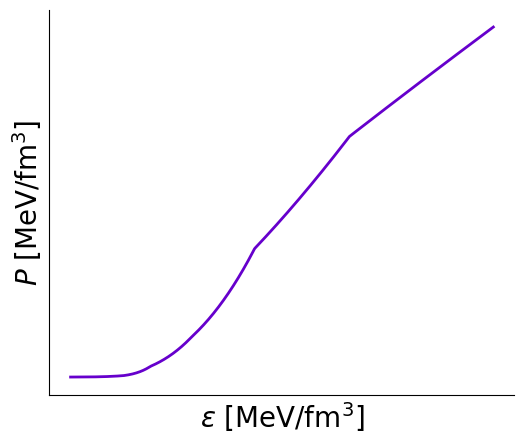

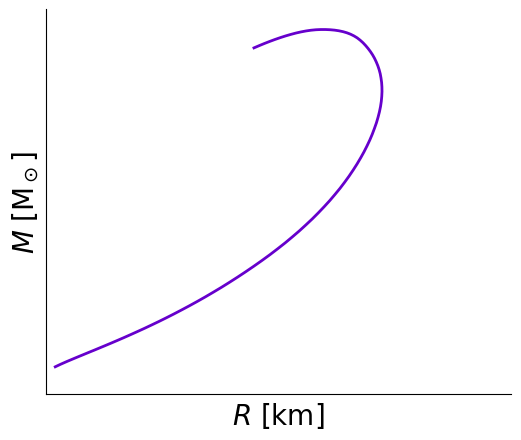

In [ ]:
feos = h5py.File(f"{location}/eos_sly.h5")
eosarr = np.array(feos["eos"]).T

i = 25

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(eosarr[i,:,1], eosarr[i,:,0], color="#6600cc", linewidth=2)
ax.set_xlabel("$\epsilon$ [MeV/fm$^3$]", fontsize=20)
ax.set_ylabel("$P$ [MeV/fm$^3$]", fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)

fig.savefig(f"{location}/tovmapex_eos.png")

plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(part1[i,:,2], part1[i,:,1], color="#6600cc", linewidth=2)
ax.set_xlabel("$R$ [km]", fontsize=20)
ax.set_ylabel("$M$ [M$_\odot$]", fontsize=20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(10, 16)
ax.set_ylim(0, 3.2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)

fig.savefig(f"{location}/tovmapex_mr.png")

plt.show()

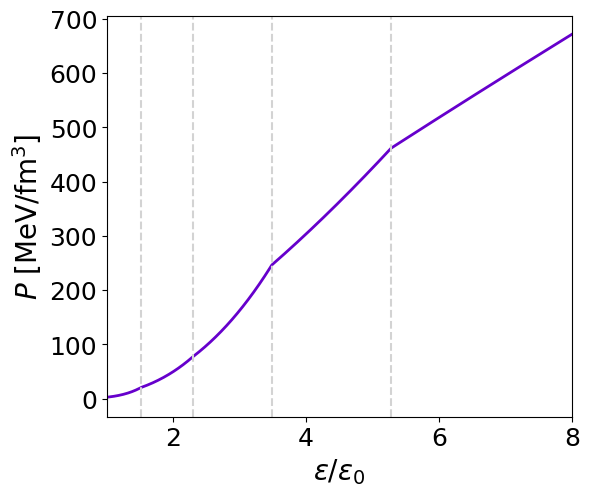

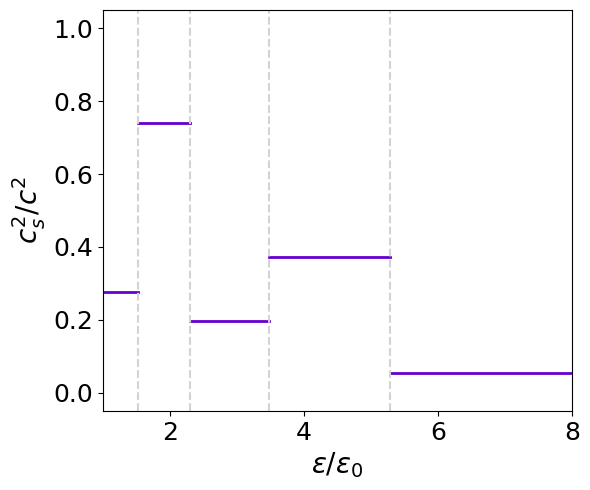

In [ ]:
feos = h5py.File(f"{location}/eos_sly.h5")
eosarr = np.array(feos["eos"]).T

i = 25
epsvalslog = np.linspace(np.log(1), np.log(8), 6)
epsvals = np.exp(epsvalslog)

fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(eosarr[i,:,1]/150.0, eosarr[i,:,0], color="#6600cc", linewidth=2)
for i in range(5):
    ax.axvline(epsvals[i], color="lightgray", linestyle="--")

ax.set_xlabel("$\epsilon / \epsilon_0$", fontsize=20)
ax.set_ylabel("$P$ [MeV/fm$^3$]", fontsize=20)
ax.set_xlim(1.0, 8.0)
ax.tick_params(axis="both", labelsize=18)

plt.tight_layout()
fig.savefig(f"{location}/cs2_to_eos.png")

plt.show()

cs2 = (np.array(feos["cs2"]).T)[i,:]

fig, ax = plt.subplots(figsize=(6, 5))
for i in range(5):
    ax.plot([epsvals[i], epsvals[i+1]], [cs2[i], cs2[i]], color="#6600cc", linewidth=2)
    ax.axvline(epsvals[i], color="lightgray", linestyle="--")

ax.set_xlabel("$\epsilon/\epsilon_0$", fontsize=20)
ax.set_ylabel("$c_s^2/c^2$", fontsize=20)
ax.tick_params(axis="both", labelsize=18)
ax.set_xlim(1.0, 8.0)
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
fig.savefig(f"{location}/cs2_example.png")

plt.show()

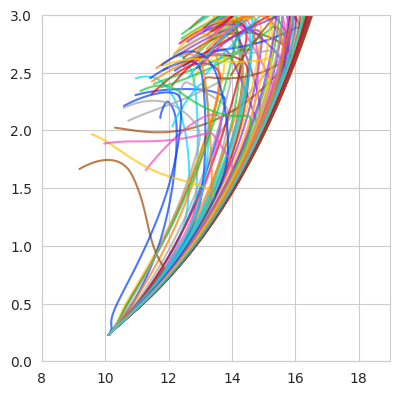

In [ ]:
fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(111)
ax.set_xlim(8, 19)
ax.set_ylim(0, 3.0)

for i in range(100):
    ax.plot(part1[i,:,2], part1[i,:,1], alpha=0.7)

plt.show()

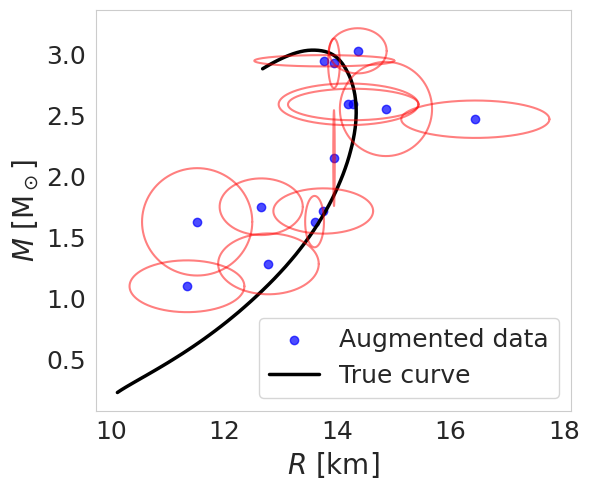

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_ellipse(center: np.ndarray, cova: np.ndarray, nsigma: int = 1, npoints: int = 1000) -> np.ndarray:
    """
    Return the coordinates of a covariance ellipse.

    Args:
        center (np.ndarray): The center of the ellipse.
        cova (np.ndarray): The covariance matrix.
        nsigma (int, optional): The number of standard deviations for the ellipse. Defaults to 1.
        npoints (int, optional): The number of points to generate on the ellipse. Defaults to 1000.

    Returns:
        np.ndarray: The coordinates of the ellipse.
    """
    cholesky_l = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, npoints)
    circle = np.column_stack([np.cos(t), np.sin(t)])
    ellipse = nsigma * circle @ cholesky_l.T + center
    return ellipse.T

# ... (previous code for data loading) ...

i = 25
ngen = 1  # Setting ngen to 1

# Extract data for plotting
Mplot = x_train[i*100, 0:14] * 3.0  # Extract M values and normalize
Rplot = x_train[i*100, 14:28] * 30.0  # Extract R values and normalize
sigmaM = x_train[i*100, 28:42] * 1.0  # Extract sigmaM and normalize
sigmaR = x_train[i*100, 42:56] * 5.0  # Extract sigmaR and normalize

# --- Applying Seaborn style ---
sns.set_style("whitegrid")  # Set the overall style to whitegrid
sns.set_palette("bright")   # Use the bright color palette

# Create the plot
fig = plt.figure(figsize=(6.0, 5.0))
ax = fig.add_subplot(111)  # Create a single subplot

# Scatter plot of data points
ax.scatter(Rplot, Mplot, alpha=0.7, label="Augmented data", color="blue")  # Blue color

# Plot the true curve
ax.plot(part1[i, :, 2], part1[i, :, 1], color="black", label="True curve", linewidth=2.5)  # Increased linewidth

# Plot ellipses for uncertainties
for j in range(len(Mplot)):
    cova = np.diag([sigmaR[j]**2, sigmaM[j]**2])  # Covariance matrix
    elx, ely = get_ellipse([Rplot[j], Mplot[j]], cova, nsigma=1)
    ax.plot(elx, ely, color="red", alpha=0.5, linewidth=1.5)  # Increased linewidth

# --- Customizing plot elements ---
ax.set_xlabel("$R$ [km]", fontsize=20)  # Increased font size
ax.set_ylabel("$M$ [M$_\odot$]", fontsize=20)  # Increased font size
ax.tick_params(axis="both", labelsize=18)
ax.legend(fontsize=18, loc="lower right")  # Increased font size for legend

ax.grid(False)  # Remove grid lines for a cleaner look

plt.tight_layout()
plt.savefig(f"{location}/datagen_example.pdf")
plt.show()

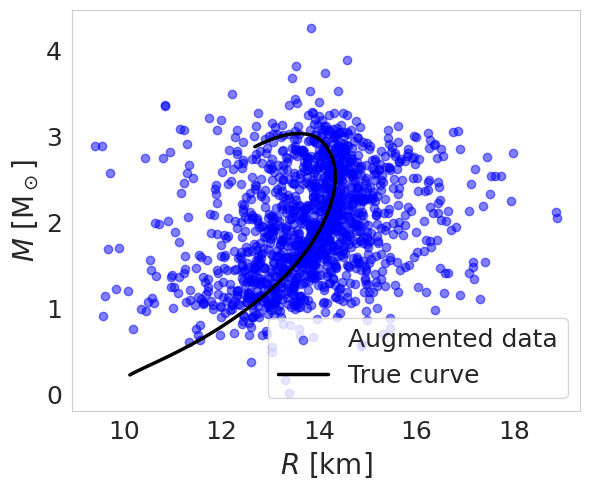

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (get_ellipse function remains the same) ...

i = 25  # EOS index to plot
ngen = 100  # Number of generated data points to plot

# Extract data for plotting
Mplot = x_train[i * 100: (i + 1) * 100, 0:14] * 3.0  # Extract M values and normalize for ngen points
Rplot = x_train[i * 100: (i + 1) * 100, 14:28] * 30.0  # Extract R values and normalize for ngen points
sigmaM = x_train[i * 100: (i + 1) * 100, 28:42] * 1.0  # Extract sigmaM and normalize for ngen points
sigmaR = x_train[i * 100: (i + 1) * 100, 42:56] * 5.0  # Extract sigmaR and normalize for ngen points


# --- Applying Seaborn style ---
sns.set_style("whitegrid")
sns.set_palette("bright")

# Create the plot
fig = plt.figure(figsize=(6.0, 5.0))
ax = fig.add_subplot(111)

# Scatter plot of generated data points
ax.scatter(Rplot, Mplot, alpha=0.5, label="Augmented data", color="blue")

# Plot the true curve
ax.plot(part1[i, :, 2], part1[i, :, 1], color="black", label="True curve", linewidth=2.5)

ax.set_xlabel("$R$ [km]", fontsize=20)
ax.set_ylabel("$M$ [M$_\odot$]", fontsize=20)
ax.legend(fontsize=18, loc="lower right")
ax.tick_params(axis="both", labelsize=18)

ax.grid(False)

plt.tight_layout()

plt.savefig(f"{location}/datagen_example_full.pdf")
plt.show()

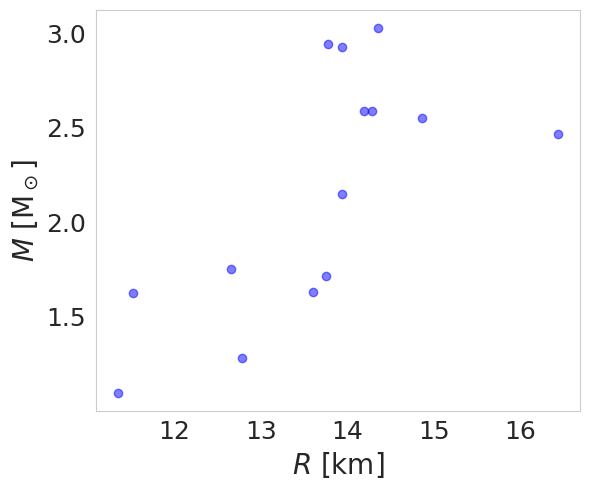

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (get_ellipse function remains the same) ...

i = 25  # EOS index to plot
ngen = 1  # Number of generated data points to plot

# Extract data for plotting
Mplot = x_train[i * 100: (i)*100 + ngen, 0:14] * 3.0  # Extract M values and normalize for ngen points
Rplot = x_train[i * 100: (i)*100 + ngen, 14:28] * 30.0  # Extract R values and normalize for ngen points
sigmaM = x_train[i * 100: (i)*100 + ngen, 28:42] * 1.0  # Extract sigmaM and normalize for ngen points
sigmaR = x_train[i * 100: (i)*100 + ngen, 42:56] * 5.0  # Extract sigmaR and normalize for ngen points

# Create the plot
fig = plt.figure(figsize=(6.0, 5.0))
ax = fig.add_subplot(111)

# Scatter plot of generated data points
ax.scatter(Rplot, Mplot, alpha=0.5, label="Augmented data", color="blue")

# Plot the true curve
# ax.plot(part1[i, :, 2], part1[i, :, 1], color="black", label="True curve", linewidth=2.5)

ax.set_xlabel("$R$ [km]", fontsize=20)
ax.set_ylabel("$M$ [M$_\odot$]", fontsize=20)
ax.tick_params(axis="both", labelsize=18)
# ax.legend(fontsize=18, loc="lower right")
# ax.set_xticks([])
# ax.set_yticks([])
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)

ax.grid(False)

plt.tight_layout()

plt.savefig(f"{location}/NNproc.png")
plt.show()

In [ ]:
initializer = keras.initializers.GlorotUniform()

model = Sequential()

din = x_train.shape[1]
model.add(Input(shape=[din]))


model.add(Dense(4*din, activation=tf.nn.relu, kernel_initializer=initializer))
model.add(Dense(4*din, activation=tf.nn.relu, kernel_initializer=initializer))
# model.add(Dense(60, activation=tf.nn.relu, kernel_initializer=initializer))

model.add(Dense(2*din, activation=tf.nn.relu, kernel_initializer=initializer))
model.add(Dense(2*din, activation=tf.nn.relu, kernel_initializer=initializer))

# model.add(Dense(40, activation=tf.nn.relu, kernel_initializer=initializer))
# model.add(Dense(40, activation=tf.nn.relu, kernel_initializer=initializer))

model.add(Dense(5, activation=tf.nn.sigmoid, kernel_initializer=initializer))
# model.add(Dense(5, activation=tf.nn.tanh, kernel_initializer=initializer))

def msle_with_variance_penalty(lambda_penalty=1.0, std_threshold=0.01):
    msle = keras.losses.MeanSquaredLogarithmicError()

    def loss(y_true, y_pred):
        # Main loss
        msle_loss = msle(y_true, y_pred)

        # Compute std of predictions
        std = tf.math.reduce_std(y_pred)

        # If std is less than threshold, add penalty
        variance_penalty = tf.nn.relu(std_threshold - std)

        # Final loss
        return msle_loss + lambda_penalty * variance_penalty

    return loss

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    # loss=keras.losses.MeanSquaredError(),
    # loss=keras.losses.MeanSquaredLogarithmicError(),
    loss=msle_with_variance_penalty(lambda_penalty=0.0, std_threshold=0.1),
    metrics=[keras.metrics.MeanSquaredError()],
)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 224)            │        12,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 224)            │        50,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 112)            │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 112)            │        12,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │           565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,589 (396.83 KB)

 Trainable params: 101,589 (396.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Assuming 'model' is your existing Keras model
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Layer):  # Check if it's a layer with weights
        if hasattr(layer, 'kernel_initializer'):  # Check if layer has kernel
            layer.kernel.assign(layer.kernel_initializer(shape=layer.kernel.shape))
        if hasattr(layer, 'bias_initializer') and layer.use_bias:  # Check if layer has bias
            layer.bias.assign(layer.bias_initializer(shape=layer.bias.shape))

early_stopping = EarlyStopping(monitor='loss',  # Monitor the training loss
                               patience=200,      # Number of epochs with no improvement after which training will be stopped
                               verbose=1,        # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
                               mode='min',       # Training will stop when the quantity monitored has stopped decreasing
                               min_delta=0.0001,     # Minimum change in the monitored quantity to qualify as an improvement
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.


class BatchHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_batch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))

batch_history = BatchHistory()

class ValidationLossPerBatch(keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        x_val, y_val = self.validation_data
        # val_loss, _ = self.model.evaluate(x_val, y_val, verbose=0)
        # self.val_losses.append(val_loss)

# Create an instance of the custom callback
validation_callback = ValidationLossPerBatch(validation_data=(x_test_tensor, y_test_tensor))

# Add the custom callback to the list of callbacks
history = model.fit(x_train_tensor,
          y_train_tensor,
          batch_size=1000,
          epochs=200,
          validation_data=(x_test_tensor, y_test_tensor),
          callbacks=[early_stopping, batch_history, validation_callback]
)

Epoch 1/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0334 - mean_squared_error: 0.0722 - val_loss: 0.0286 - val_mean_squared_error: 0.0624
Epoch 2/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0293 - mean_squared_error: 0.0638 - val_loss: 0.0281 - val_mean_squared_error: 0.0613
Epoch 3/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0288 - mean_squared_error: 0.0628 - val_loss: 0.0279 - val_mean_squared_error: 0.0606
Epoch 4/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0286 - mean_squared_error: 0.0624 - val_loss: 0.0277 - val_mean_squared_error: 0.0606
Epoch 5/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0621 - val_loss: 0.0290 - val_mean_squared_error: 0.0635
Epoch 6/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0285 - mean_squared_error: 0.0622 - val_loss: 0.0277 - val_mean_squared_error: 0.0608
Epoch 7/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0283 - mean_squared_error: 0.0618 - val_los

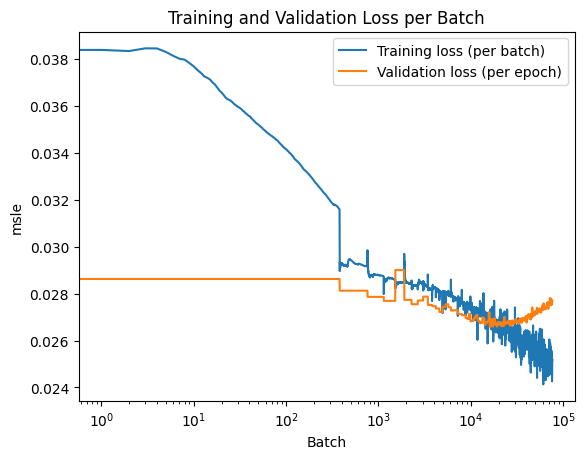

In [ ]:
# plt.plot(batch_history.losses, label="Training loss")
# plt.plot(validation_callback.val_losses, label='Validation loss)')
# plt.title('Training and Validation Loss per Batch')
# plt.xlabel('Batch')
# plt.ylabel('msle')
# plt.xscale("log")
# plt.legend()
# plt.show()

# Calculate validation loss per batch
num_batches_per_epoch = len(batch_history.losses) // len(history.history['val_loss'])
val_loss_per_batch = np.repeat(history.history['val_loss'], num_batches_per_epoch)

# Plotting
plt.plot(batch_history.losses, label="Training loss (per batch)")
plt.plot(val_loss_per_batch, label='Validation loss (per epoch)')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch')
plt.ylabel('msle')
plt.xscale("log")
plt.legend()
plt.show()

In [ ]:
#can you save the loss and validation loss per batch
df = pd.DataFrame({
    "training_loss": batch_history.losses,
    "validation_loss": val_loss_per_batch
})

# df.to_csv(f"{location}/losses_sly.csv", index=False)
df.to_csv(f"{location}/losses_ska.csv", index=False)

In [ ]:
#save the model
# model.save(f"{location}/model_sly.keras")
model.save(f"{location}/model_ska.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(1, 56)
(1, 5)


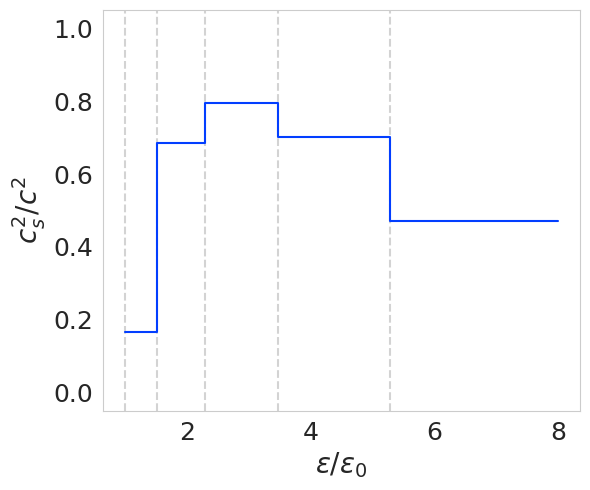

In [ ]:
i = 25

import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("bright")

# Create the plot
fig, ax = plt.subplots(figsize=(6.0, 5.0))

xdatatest = x_train[i*100:(i)*100 + 1,:]
ypred = model_sly.predict(xdatatest)
print(xdatatest.shape)
print(ypred.shape)

ypredmean = np.mean(ypred, axis=0)
yexpect = y_train[i*100,:]

rhovalsilog = np.linspace(np.log(1), np.log(8), 6)
rhovalsi = np.exp(rhovalsilog)
ypredvals = []
rhovals = []
for i in range(5):
    rhovals.append(rhovalsi[i])
    ypredvals.append(ypredmean[i])
    ypredvals.append(ypredmean[i])
    rhovals.append(rhovalsi[i+1])
    ax.axvline(rhovalsi[i], color="lightgray", linestyle="--")

ax.plot(rhovals, ypredvals)
ax.grid(False)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel("$\epsilon/\epsilon_0$", fontsize=20)
ax.set_ylabel("$c_s^2/c^2$", fontsize=20)
ax.tick_params(axis="both", labelsize=18)

plt.tight_layout()
fig.savefig(f"{location}/nnproc_cs2.png")

plt.show()

# Model loading

In [ ]:
location = "."

model_sly = keras.models.load_model(f"{location}/model_sly.keras", custom_objects={'loss': keras.losses.MeanSquaredLogarithmicError()})
model_ska = keras.models.load_model(f"{location}/model_ska.keras", custom_objects={'loss': keras.losses.MeanSquaredLogarithmicError()})

model_sly.summary()
# model_ska.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 224)            │        12,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 224)            │        50,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 112)            │        25,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 112)            │        12,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 5)              │           565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,769 (1.16 MB)

 Trainable params: 101,589 (396.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,180 (793.68 KB)

In [ ]:
#plot the sly model

plot_model(model_sly, to_file=f"{location}/model_plot.pdf", show_shapes=True, show_layer_names=False, show_layer_activations=True, rankdir="LR")

# Inference

The observational data is organized as follows: {$M_{\text{obs} 1}$, ..., $M_{\text{obs} N}$, $R_{\text{obs} 1}$, ..., $R_{\text{obs} N}$, $\sigma_{M,{\text{obs} 1}}$, ..., $\sigma_{M,{\text{obs} N}}$, $\sigma_{R,{\text{obs} 1}}$, $\sigma_{R,{\text{obs} N}}$}. The observational data $\text{obs}1, ..., \text{obs}N$ is taken from the events:



1.   4U 1608-52
2.   4U 1724-207
3.   KS 1731-206
4.   EXO 1745-248
5.   SAX J1748.9-2021
6.   4U 1820-30
7.   M13
8.   M28
9.   M30
10.  NGC 6304
11.  NGC 6397
12.  $\omega$ Cen
13.  X5
14.  X7

In [ ]:
datacomp = np.array([
    #---
    #M
    1.57,
    1.9,
    1.61,
    1.65,
    1.81,
    1.77,

    #qLMXBs
    1.15,
    1.17,
    1.4,
    1.12,
    0.84,
    1.84,
    0.885,
    1.46,

    #---
    #R
    9.8,
    12.2,
    10.0,
    10.5,
    11.7,
    11.1,

    #qLMXBs
    9.2,
    10.6,
    13.4,
    9.4,
    6.6,
    19.6,
    10.5,
    10.8,

    #---
    #sigM
    0.295,
    0.285,
    0.36,
    0.26,
    0.31,
    0.265,

    #qLMXBs
    0.475,
    0.535,
    0.0, #M fixed
    0.515,
    0.26,
    1.04,
    0.635,
    0.87,

    #---
    #sigR
    1.8,
    1.4,
    2.2,
    1.6,
    1.7,
    1.8,

    #qLMXBs
    2.0,
    1.75,
    3.95,
    2.4,
    0.9,
    3.55,
    5.9,
    6.3,
])

Mnorm = 3.0
Rnorm = 30.0
sigmaMnorm = 1.0
sigmaRnorm = 5.0

datacomp[0:14] = datacomp[0:14]/Mnorm
datacomp[14:28] = datacomp[14:28]/Rnorm
datacomp[28:42] = datacomp[28:42]/sigmaMnorm
datacomp[42:56] = datacomp[42:56]/sigmaRnorm

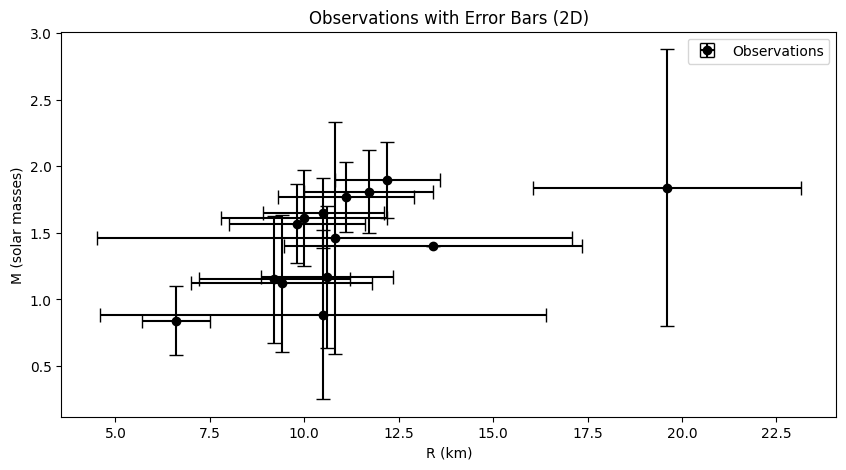

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming datacomp is already calculated

# --- Extract data from datacomp ---
y_values = datacomp[0:14] * 3.0      # Y-coordinates (M), rescaled
x_values = datacomp[14:28] * 30.0    # X-coordinates (R), rescaled
y_errors = datacomp[28:42] * 1.0    # Y-errors (sigM), rescaled
x_errors = datacomp[42:56] * 5.0    # X-errors (sigR), rescaled

# --- Plotting ---
plt.figure(figsize=(10, 5))

# Plot observations with error bars in both x and y directions
plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors,
             fmt='o', label="Observations", color="black", capsize=5)

plt.title("Observations with Error Bars (2D)")
plt.xlabel("R (km)")
plt.ylabel("M (solar masses)")
plt.legend()
plt.show()

In [ ]:
def generate_new_points(datacomp, num_samples=100):
    """Generates new datacomp points based on normal distributions,
    keeping the same form as the original datacomp.

    Args:
        datacomp: The original datacomp array.
        num_samples: The number of new samples to generate.

    Returns:
        A new datacomp array with the generated points in the same form as the original.
    """

    # Extract means (M, R) and standard deviations (sigM, sigR)
    M = datacomp[0:14]
    R = datacomp[14:28]
    sigM = datacomp[28:42]
    sigR = datacomp[42:56]

    # Initialize the final array
    final_datacomp = np.zeros((num_samples, 56))

    # Generate samples for each data point and assign to final_datacomp
    for i in range(num_samples):
        # Randomly choose an index from the original data points
        idx = np.random.randint(0, len(M))

        # Generate new M and R values based on the chosen data point's distribution
        new_M = np.random.normal(loc=M[idx], scale=sigM[idx])
        new_R = np.random.normal(loc=R[idx], scale=sigR[idx])

        # Fill the final_datacomp array with the new values
        final_datacomp[i, 0:14] = new_M  # Assign new_M to all columns in the M range
        final_datacomp[i, 14:28] = new_R  # Assign new_R to all columns in the R range
        final_datacomp[i, 28:42] = sigM[idx]  # Assign original sigM to all columns in the sigM range
        final_datacomp[i, 42:56] = sigR[idx]  # Assign original sigR to all columns in the sigR range

    return final_datacomp

In [ ]:
datacomp_gen = generate_new_points(datacomp, num_samples=1000)

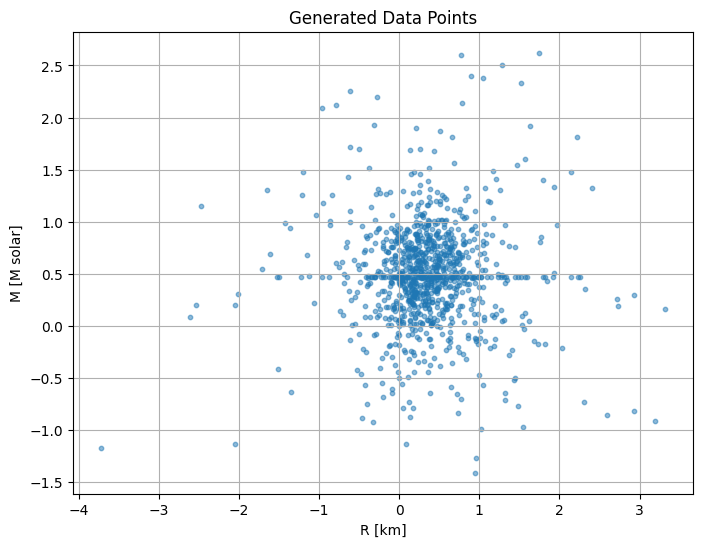

In [ ]:
# Extract M and R values from the generated data
M_gen = datacomp_gen[:, 0]  # Take the first element from each row for M
R_gen = datacomp_gen[:, 14] # Take the 15th element from each row for R

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(R_gen, M_gen, s=10, alpha=0.5)  # s controls marker size, alpha controls transparency

plt.xlabel("R [km]")
plt.ylabel("M [M solar]")
plt.title("Generated Data Points")
plt.grid(True)  # Add a grid for better visualization

plt.show()

In [ ]:
nnpred_sly = model_sly.predict(tf.convert_to_tensor(datacomp_gen[:,0:56]))
nnpred_ska = model_ska.predict(tf.convert_to_tensor(datacomp_gen[:,0:56]))

print(np.mean(nnpred_sly, axis=0))
print(np.std(nnpred_sly, axis=0))
print()
print(np.mean(nnpred_ska, axis=0))
print(np.std(nnpred_ska, axis=0))

nnpred_sly_once = model_sly.predict(tf.convert_to_tensor(datacomp[0:56].reshape(1,56)))
nnpred_ska_once = model_ska.predict(tf.convert_to_tensor(datacomp[0:56].reshape(1,56)))

print()
print(nnpred_sly_once)
print(nnpred_ska_once)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.40653753 0.24859928 0.38452634 0.38404068 0.57415193]
[0.40773585 0.3288503  0.34995136 0.36042738 0.3124474 ]

[0.35430056 0.22636108 0.25490463 0.31713733 0.44804257]
[0.4309959  0.29046887 0.32377726 0.33368677 0.36173648]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

[[0.13998118 0.06627039 0.5341189  0.55117273 0.59251773]]
[[0.05869751 0.5380362  0.37644485 0.35134888 0.09366488]]


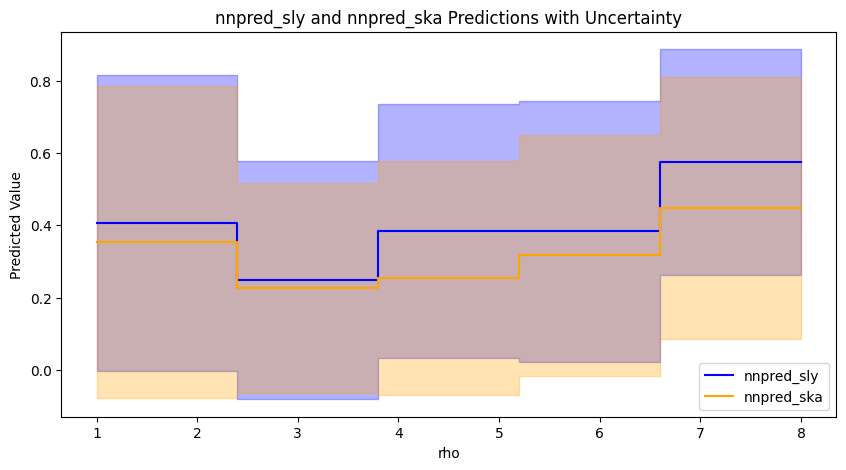

In [ ]:
# Assuming nnpred_sly and nnpred_ska are already calculated

# --- Calculations for sly and ska ---
ypredmean_sly = np.mean(nnpred_sly, axis=0)
ypredstd_sly = np.std(nnpred_sly, axis=0)
ypredmean_ska = np.mean(nnpred_ska, axis=0)
ypredstd_ska = np.std(nnpred_ska, axis=0)

rhovalsi = np.linspace(1, 8, 6)
ypredvals_sly = []
ypredupper_sly = []
ypredlower_sly = []
ypredvals_ska = []
ypredupper_ska = []
ypredlower_ska = []
rhovals = []

for i in range(5):
    rhovals.append(rhovalsi[i])

    # sly calculations
    ypredvals_sly.append(ypredmean_sly[i])
    ypredupper_sly.append(ypredmean_sly[i] + ypredstd_sly[i])
    ypredlower_sly.append(ypredmean_sly[i] - ypredstd_sly[i])
    ypredvals_sly.append(ypredmean_sly[i])
    ypredupper_sly.append(ypredmean_sly[i] + ypredstd_sly[i])
    ypredlower_sly.append(ypredmean_sly[i] - ypredstd_sly[i])

    # ska calculations
    ypredvals_ska.append(ypredmean_ska[i])
    ypredupper_ska.append(ypredmean_ska[i] + ypredstd_ska[i])
    ypredlower_ska.append(ypredmean_ska[i] - ypredstd_ska[i])
    ypredvals_ska.append(ypredmean_ska[i])
    ypredupper_ska.append(ypredmean_ska[i] + ypredstd_ska[i])
    ypredlower_ska.append(ypredmean_ska[i] - ypredstd_ska[i])

    rhovals.append(rhovalsi[i + 1])

# --- Plotting both on the same plot ---
plt.figure(figsize=(10, 5))  # Adjust figure size if needed

plt.plot(rhovals, ypredvals_sly, labelSKA="nnpred_sly", color="blue")
plt.fill_between(rhovals, ypredlower_sly, ypredupper_sly, alpha=0.3, color="blue")

plt.plot(rhovals, ypredvals_ska, label="nnpred_ska", color="orange")
plt.fill_between(rhovals, ypredlower_ska, ypredupper_ska, alpha=0.3, color="orange")

plt.title("nnpred_sly and nnpred_ska Predictions with Uncertainty")
plt.xlabel("rho")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

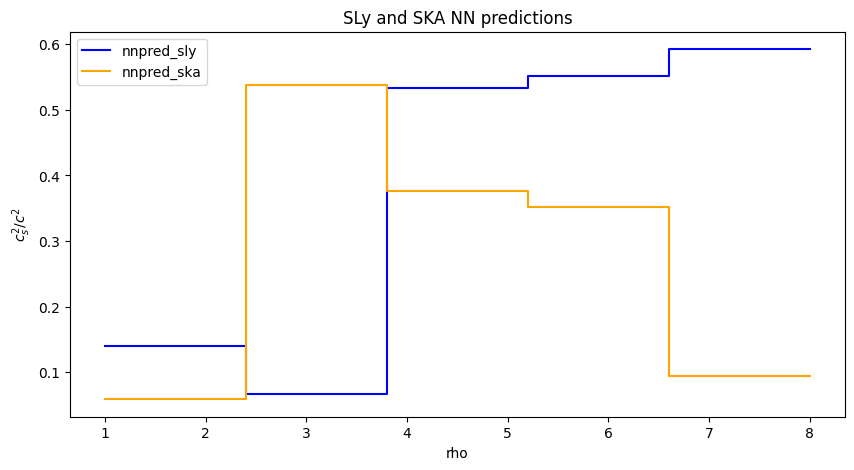

In [ ]:
# --- Calculations for sly and ska --SKA-
ypredmean_sly = nnpred_sly_once.reshape(5, -1)
ypredmean_ska = nnpred_ska_once.reshape(5, -1)

rhovalsi = np.linspace(1, 8, 6)
ypredvals_sly = [SKASKA]
ypredvals_ska = []
rhovals = []

for i in range(5):
    rhovals.append(rhovalsi[i])

    # sly calculations
    ypredvals_sly.append(ypredmean_sly[i])
    ypredvals_sly.append(ypredmean_sly[i])

    # ska calculations
    ypredvals_ska.append(ypredmean_ska[i])
    ypredvals_ska.append(ypredmean_ska[i])

    rhovals.append(rhovalsi[i + 1])

# --- Plotting both on the same plot ---
plt.figure(figsize=(10, 5))  # Adjust figure size if needed

plt.plot(rhovals, ypredvals_sly, label="nnpred_sly", color="blue")
plt.plot(rhovals, ypredvals_ska, label="nnpred_ska", color="orange")

plt.title("SLy and SKA NN predictions")
plt.xlabel("rho")
plt.ylabel("$c_s^2/c^2$")
plt.legend()
plt.show()

# Distribution of predictions and errors

In [ ]:
location = "."
neos = 4000
f_sly = h5py.File(f"{location}/nndata_sly.h5", "r")
f_ska = h5py.File(f"{location}/nndata_ska.h5", "r")
data_sly = np.array(f_sly["data"][:,0:neos*100])
data_ska = np.array(f_ska["data"][:,0:neos*100])
f_sly.close()
f_ska.close()

data_sly = data_sly.T
data_ska = data_ska.T

datasize = data_sly.shape[0]
traindiv = 0.95
trainsize = int(traindiv*datasize)

x_train_sly = data_sly[0:trainsize,0:56]
x_train_ska = data_ska[0:trainsize,0:56]
y_train_sly = data_sly[0:trainsize,56:61]
y_train_ska = data_ska[0:trainsize,56:61]

x_test_sly = data_sly[trainsize:datasize,0:56]
x_test_ska = data_ska[trainsize:datasize,0:56]
y_test_sly = data_sly[trainsize:datasize,56:61]
y_test_ska = data_ska[trainsize:datasize,56:61]

x_train_sly_tensor = tf.convert_to_tensor(x_train_sly)
x_train_ska_tensor = tf.convert_to_tensor(x_train_ska)
y_train_sly_tensor = tf.convert_to_tensor(y_train_sly)
y_train_ska_tensor = tf.convert_to_tensor(y_train_ska)

x_test_sly_tensor = tf.convert_to_tensor(x_test_sly)
x_test_ska_tensor = tf.convert_to_tensor(x_test_ska)
y_test_sly_tensor = tf.convert_to_tensor(y_test_sly)
y_test_ska_tensor = tf.convert_to_tensor(y_test_ska)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


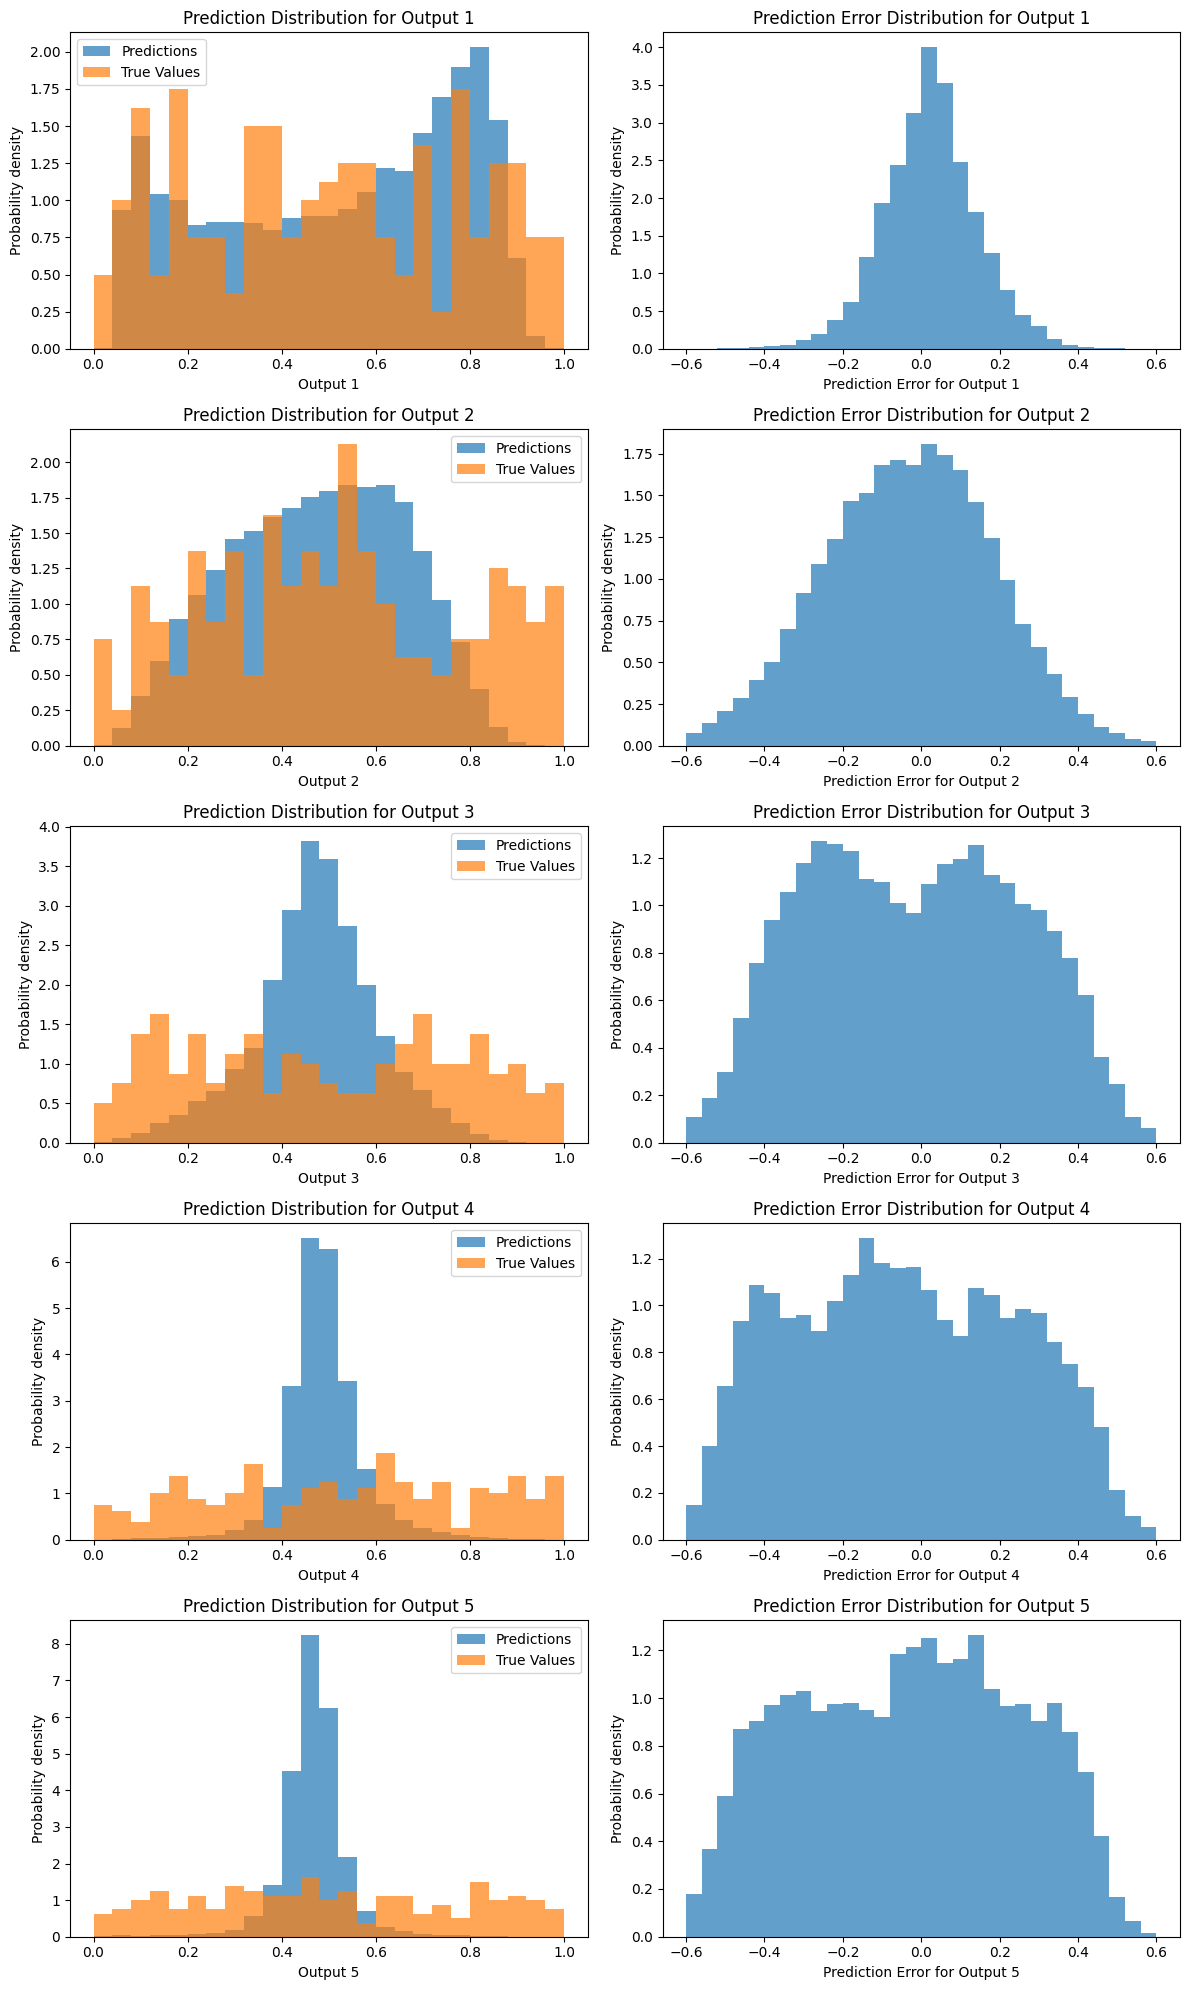

       Output_1_Error  Output_2_Error  Output_3_Error  Output_4_Error  \
count    20000.000000    20000.000000    20000.000000    20000.000000   
mean         0.023233       -0.033373       -0.020369       -0.043672   
std          0.119932        0.216528        0.271245        0.285144   
min         -0.598488       -0.799584       -0.782909       -0.784561   
25%         -0.052424       -0.181964       -0.244219       -0.279719   
50%          0.023905       -0.026757       -0.020970       -0.052789   
75%          0.096139        0.117813        0.197201        0.189961   
max          0.509101        0.683197        0.733514        0.730120   

       Output_5_Error  
count    20000.000000  
mean        -0.032977  
std          0.281465  
min         -0.806948  
25%         -0.268105  
50%         -0.021589  
75%          0.190264  
max          0.782384  


In [ ]:
y_pred = model_sly.predict(x_test_sly_tensor)  # or model_ska.predict(x_test_tensor)

# Calculate prediction errors
prediction_errors = y_pred - y_test_sly_tensor.numpy()

# Number of output parameters
num_outputs = y_test_sly_tensor.shape[1]

# Create subplots for each output
fig, axes = plt.subplots(num_outputs, 2, figsize=(12, num_outputs * 4))

# Define bin edges for discretization
prediction_bins = np.linspace(0.0, 1.0, 25 + 1)  # 25 intervals from 0.0 to 1.0
error_bins = np.linspace(-0.6, 0.6, 30 + 1)     # 30 intervals from -0.6 to 0.6

for i in range(num_outputs):
    # Prediction distribution
    axes[i, 0].hist(y_pred[:, i], bins=prediction_bins, alpha=0.7, label="Predictions", density=True)
    axes[i, 0].hist(y_test_sly_tensor.numpy()[:, i], bins=prediction_bins, alpha=0.7, label="True Values", density=True)
    axes[i, 0].set_xlabel(f"Output {i + 1}")
    axes[i, 0].set_ylabel("Probability density")
    axes[i, 0].set_title(f"Prediction Distribution for Output {i + 1}")
    axes[i, 0].legend()

    # Prediction error distribution
    axes[i, 1].hist(prediction_errors[:, i], bins=error_bins, alpha=0.7, density=True)
    axes[i, 1].set_xlabel(f"Prediction Error for Output {i + 1}")
    axes[i, 1].set_ylabel("Probability density")
    axes[i, 1].set_title(f"Prediction Error Distribution for Output {i + 1}")

plt.tight_layout()
plt.show()

# Creating a dataframe of prediction errors for a more quantitative analysis
df_prediction_errors = pd.DataFrame(prediction_errors)
df_prediction_errors.columns = [f"Output_{i+1}_Error" for i in range(num_outputs)]
# You can analyze basic statistical properties of the distribution now
print(df_prediction_errors.describe())

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


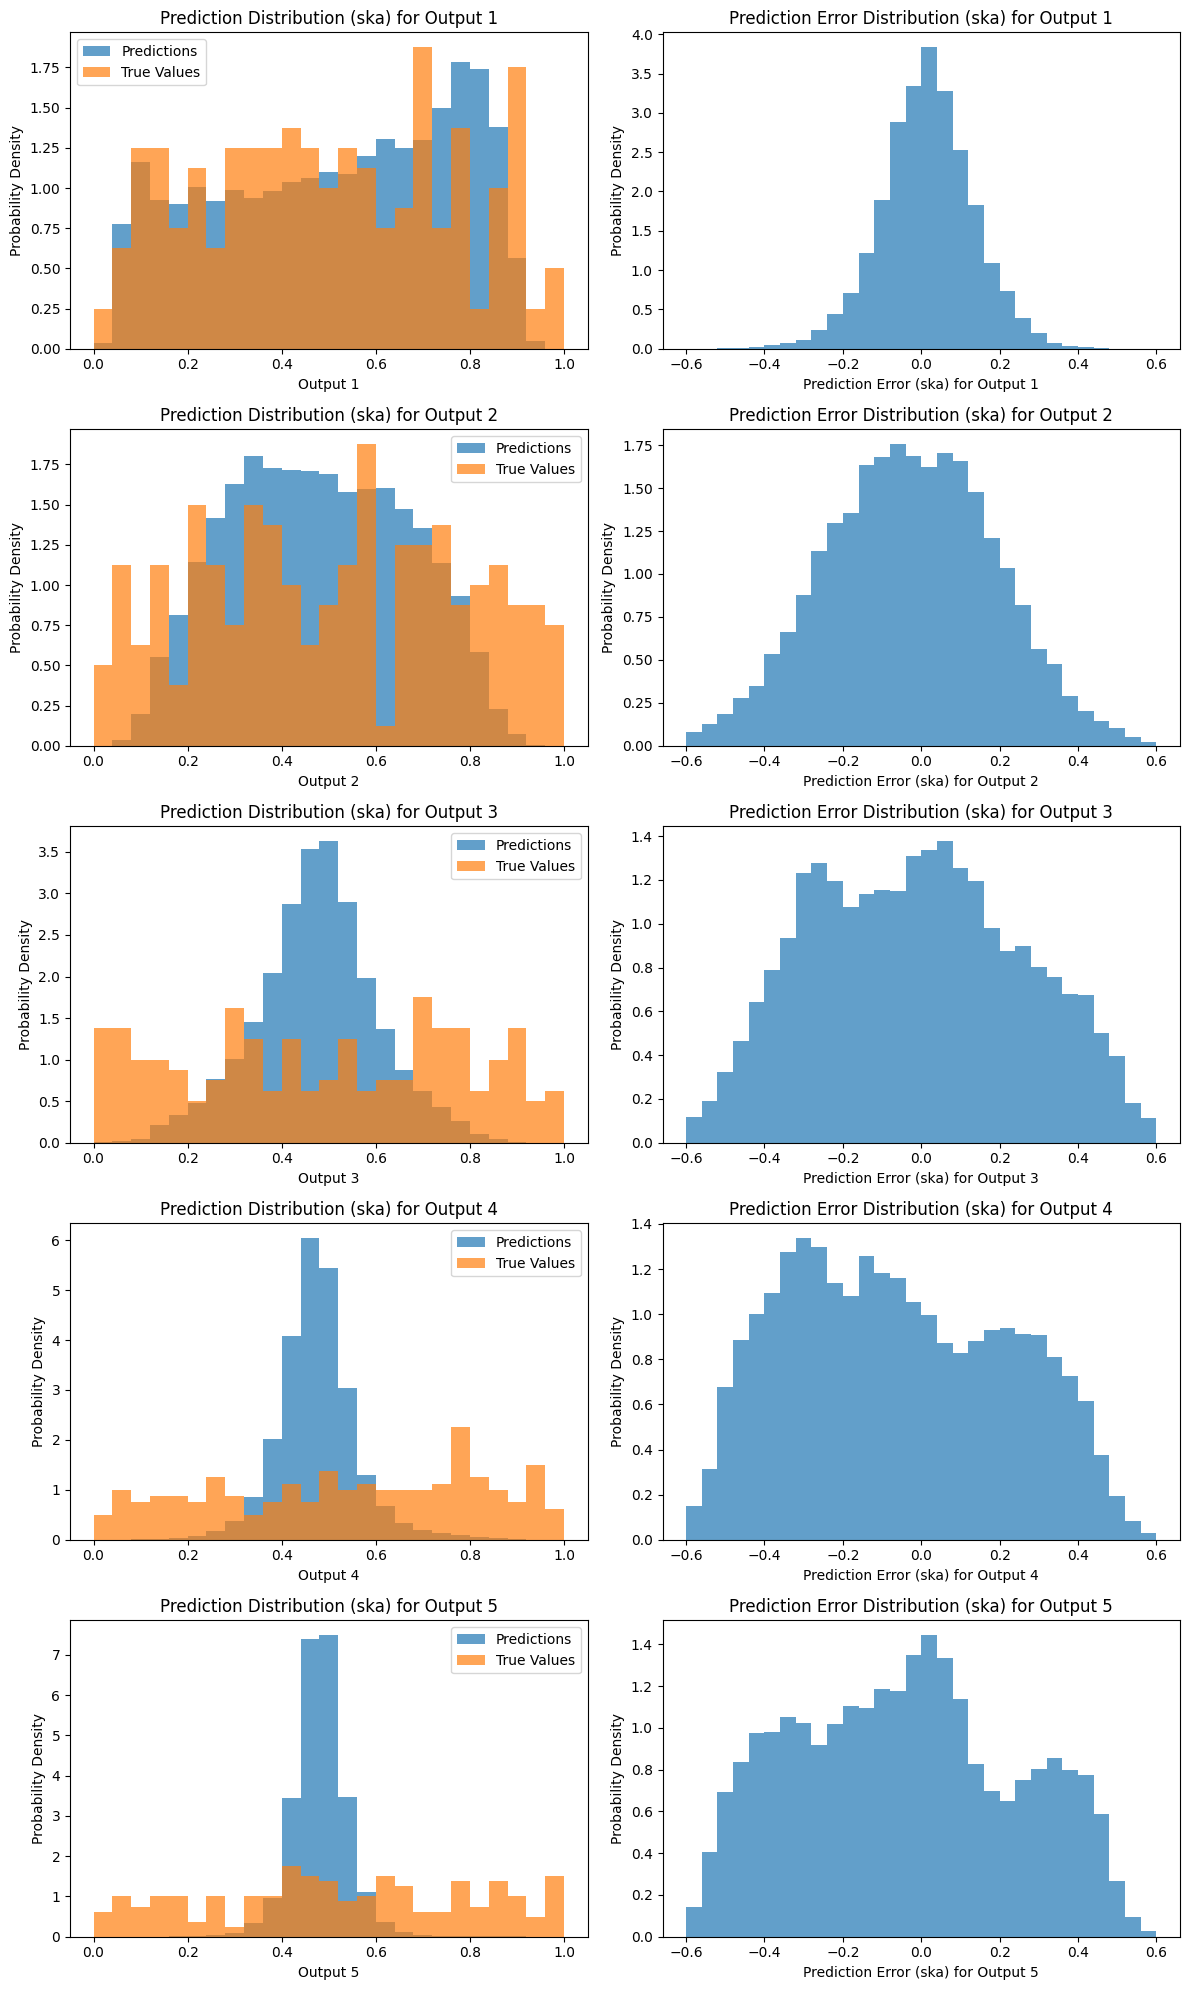

       Output_1_Error  Output_2_Error  Output_3_Error  Output_4_Error  \
count    20000.000000    20000.000000    20000.000000    20000.000000   
mean         0.015078       -0.029086       -0.012979       -0.063189   
std          0.117766        0.217028        0.270539        0.281503   
min         -0.570578       -0.809981       -0.813639       -0.786744   
25%         -0.058848       -0.179730       -0.231514       -0.296655   
50%          0.016009       -0.028235       -0.013954       -0.088016   
75%          0.089833        0.123037        0.185636        0.171652   
max          0.505209        0.765910        0.763236        0.744942   

       Output_5_Error  
count    20000.000000  
mean        -0.043947  
std          0.282964  
min         -0.745985  
25%         -0.276048  
50%         -0.044811  
75%          0.163386  
max          0.805480  


In [ ]:
# Make predictions using the ska model
y_pred_ska = model_ska.predict(x_test_ska_tensor)

# Calculate prediction errors for ska model
prediction_errors_ska = y_pred_ska - y_test_ska_tensor.numpy()

# Number of output parameters
num_outputs = y_test_ska_tensor.shape[1]

# Create subplots for each output (ska model)
fig, axes = plt.subplots(num_outputs, 2, figsize=(12, num_outputs * 4))

# Define bin edges for discretization
prediction_bins = np.linspace(0.0, 1.0, 25 + 1)  # 25 intervals from 0.0 to 1.0
error_bins = np.linspace(-0.6, 0.6, 30 + 1)     # 30 intervals from -0.6 to 0.6

for i in range(num_outputs):
    # Prediction distribution (normalized, ska model)
    axes[i, 0].hist(y_pred_ska[:, i], bins=prediction_bins, alpha=0.7, label="Predictions", density=True)
    axes[i, 0].hist(y_test_ska_tensor.numpy()[:, i], bins=prediction_bins, alpha=0.7, label="True Values", density=True)
    axes[i, 0].set_xlabel(f"Output {i + 1}")
    axes[i, 0].set_ylabel("Probability Density")
    axes[i, 0].set_title(f"Prediction Distribution (ska) for Output {i + 1}")
    axes[i, 0].legend()

    # Prediction error distribution (normalized, ska model)
    axes[i, 1].hist(prediction_errors_ska[:, i], bins=error_bins, alpha=0.7, density=True)
    axes[i, 1].set_xlabel(f"Prediction Error (ska) for Output {i + 1}")
    axes[i, 1].set_ylabel("Probability Density")
    axes[i, 1].set_title(f"Prediction Error Distribution (ska) for Output {i + 1}")

plt.tight_layout()
plt.show()

# Creating a dataframe of prediction errors for ska model
df_prediction_errors_ska = pd.DataFrame(prediction_errors_ska)
df_prediction_errors_ska.columns = [f"Output_{i+1}_Error" for i in range(num_outputs)]
# You can analyze basic statistical properties of the distribution now
print(df_prediction_errors_ska.describe())

11875/11875 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


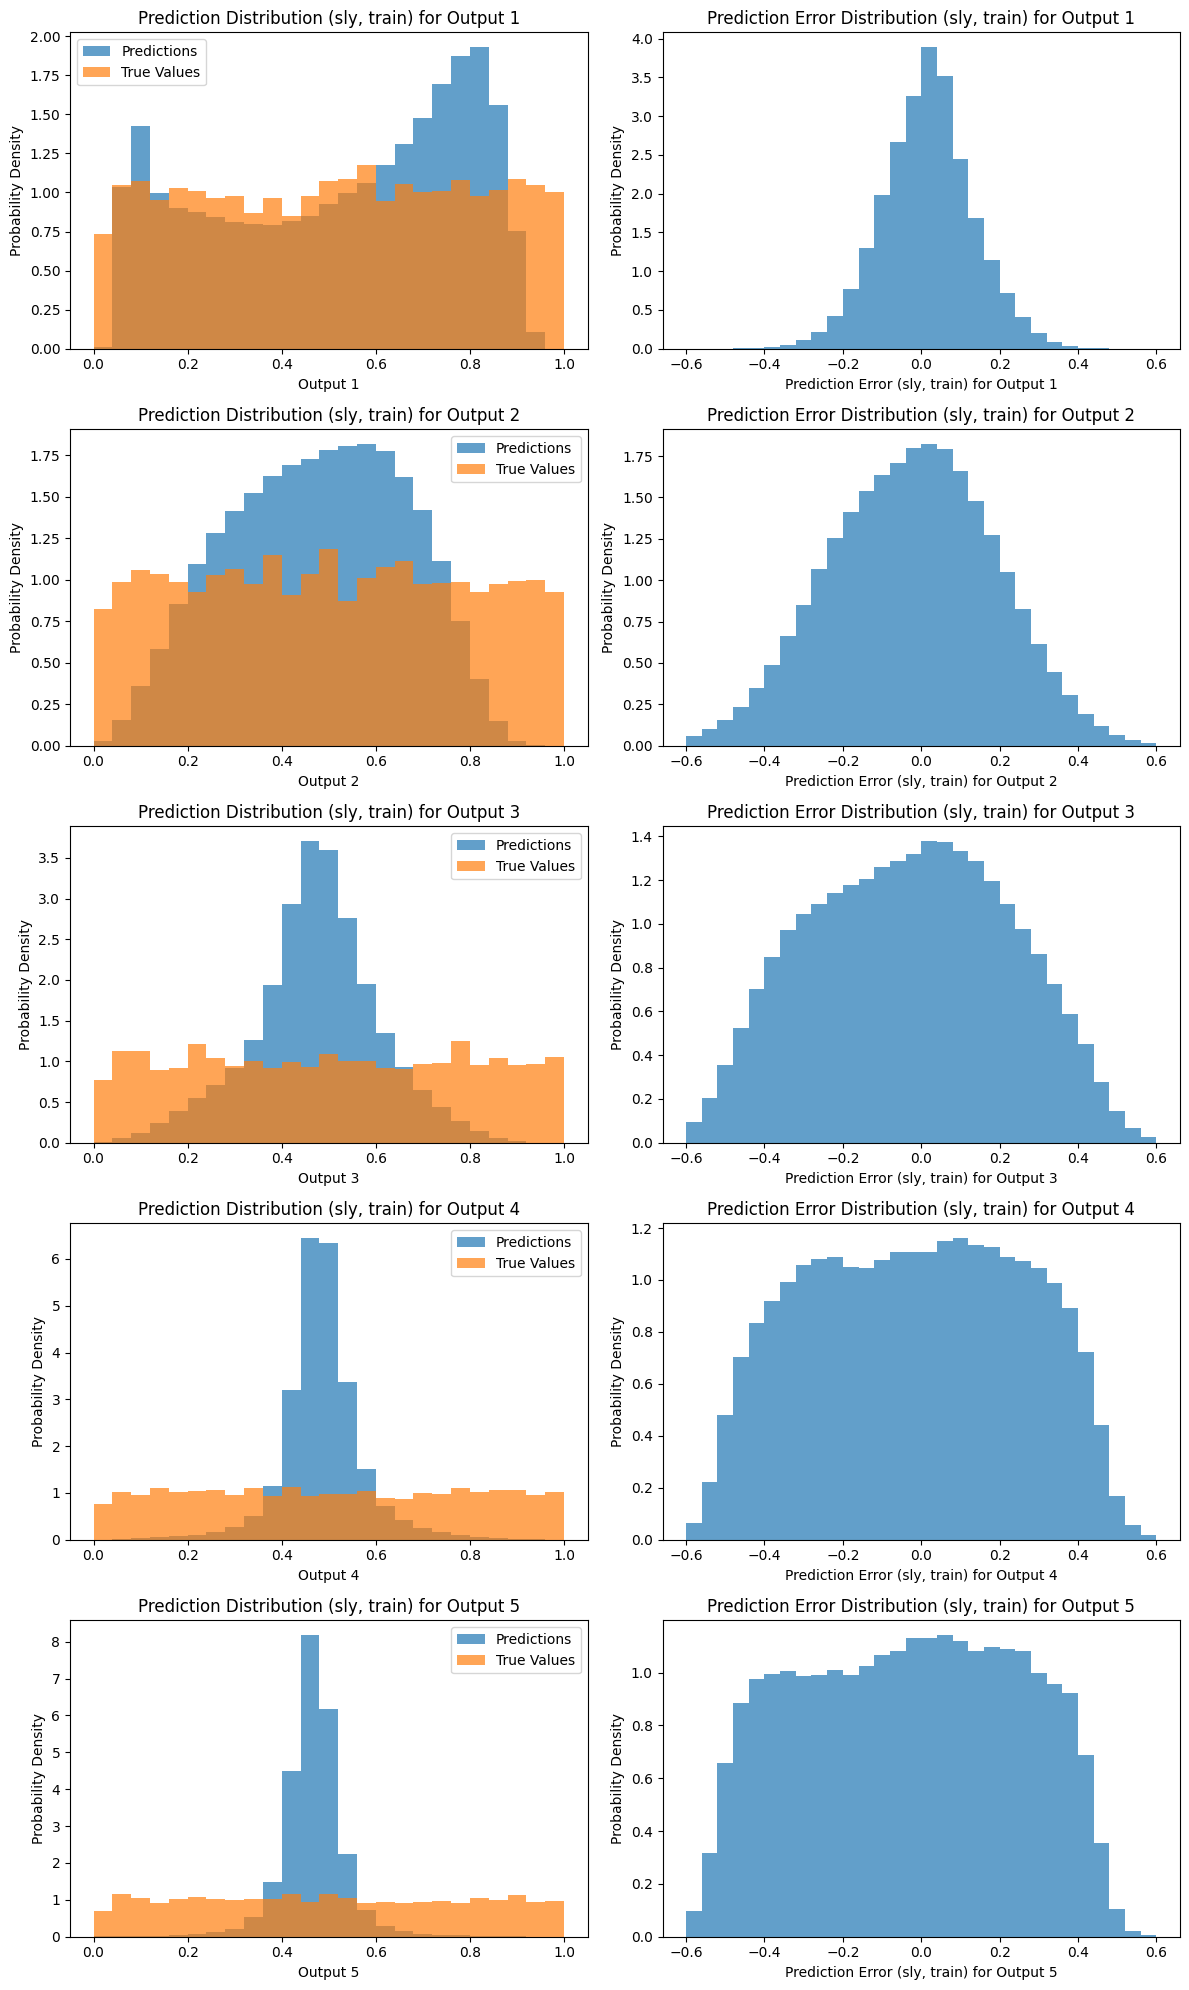

       Output_1_Error  Output_2_Error  Output_3_Error  Output_4_Error  \
count   380000.000000   380000.000000   380000.000000   380000.000000   
mean         0.015459       -0.024173       -0.028773       -0.017128   
std          0.116414        0.210584        0.253740        0.272997   
min         -0.621612       -0.865458       -0.850312       -0.833676   
25%         -0.058629       -0.171807       -0.226875       -0.244283   
50%          0.017666       -0.018279       -0.022738       -0.012200   
75%          0.087212        0.124074        0.164979        0.208896   
max          0.574572        0.753720        0.781722        0.848670   

       Output_5_Error  
count   380000.000000  
mean        -0.033140  
std          0.277195  
min         -0.789662  
25%         -0.266998  
50%         -0.025328  
75%          0.198946  
max          0.731644  


In [ ]:
# --- sly model on train data ---
y_pred_sly_train = model_sly.predict(x_train_sly_tensor)
prediction_errors_sly_train = y_pred_sly_train - y_train_sly_tensor.numpy()
num_outputs = y_train_sly_tensor.shape[1]

fig, axes = plt.subplots(num_outputs, 2, figsize=(12, num_outputs * 4))
prediction_bins = np.linspace(0.0, 1.0, 25 + 1)
error_bins = np.linspace(-0.6, 0.6, 30 + 1)

for i in range(num_outputs):
    axes[i, 0].hist(y_pred_sly_train[:, i], bins=prediction_bins, alpha=0.7, label="Predictions", density=True)
    axes[i, 0].hist(y_train_sly_tensor.numpy()[:, i], bins=prediction_bins, alpha=0.7, label="True Values", density=True)
    axes[i, 0].set_xlabel(f"Output {i + 1}")
    axes[i, 0].set_ylabel("Probability Density")
    axes[i, 0].set_title(f"Prediction Distribution (sly, train) for Output {i + 1}")
    axes[i, 0].legend()

    axes[i, 1].hist(prediction_errors_sly_train[:, i], bins=error_bins, alpha=0.7, density=True)
    axes[i, 1].set_xlabel(f"Prediction Error (sly, train) for Output {i + 1}")
    axes[i, 1].set_ylabel("Probability Density")
    axes[i, 1].set_title(f"Prediction Error Distribution (sly, train) for Output {i + 1}")

plt.tight_layout()
plt.show()

df_prediction_errors_sly_train = pd.DataFrame(prediction_errors_sly_train)
df_prediction_errors_sly_train.columns = [f"Output_{i+1}_Error" for i in range(num_outputs)]
print(df_prediction_errors_sly_train.describe())

11875/11875 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


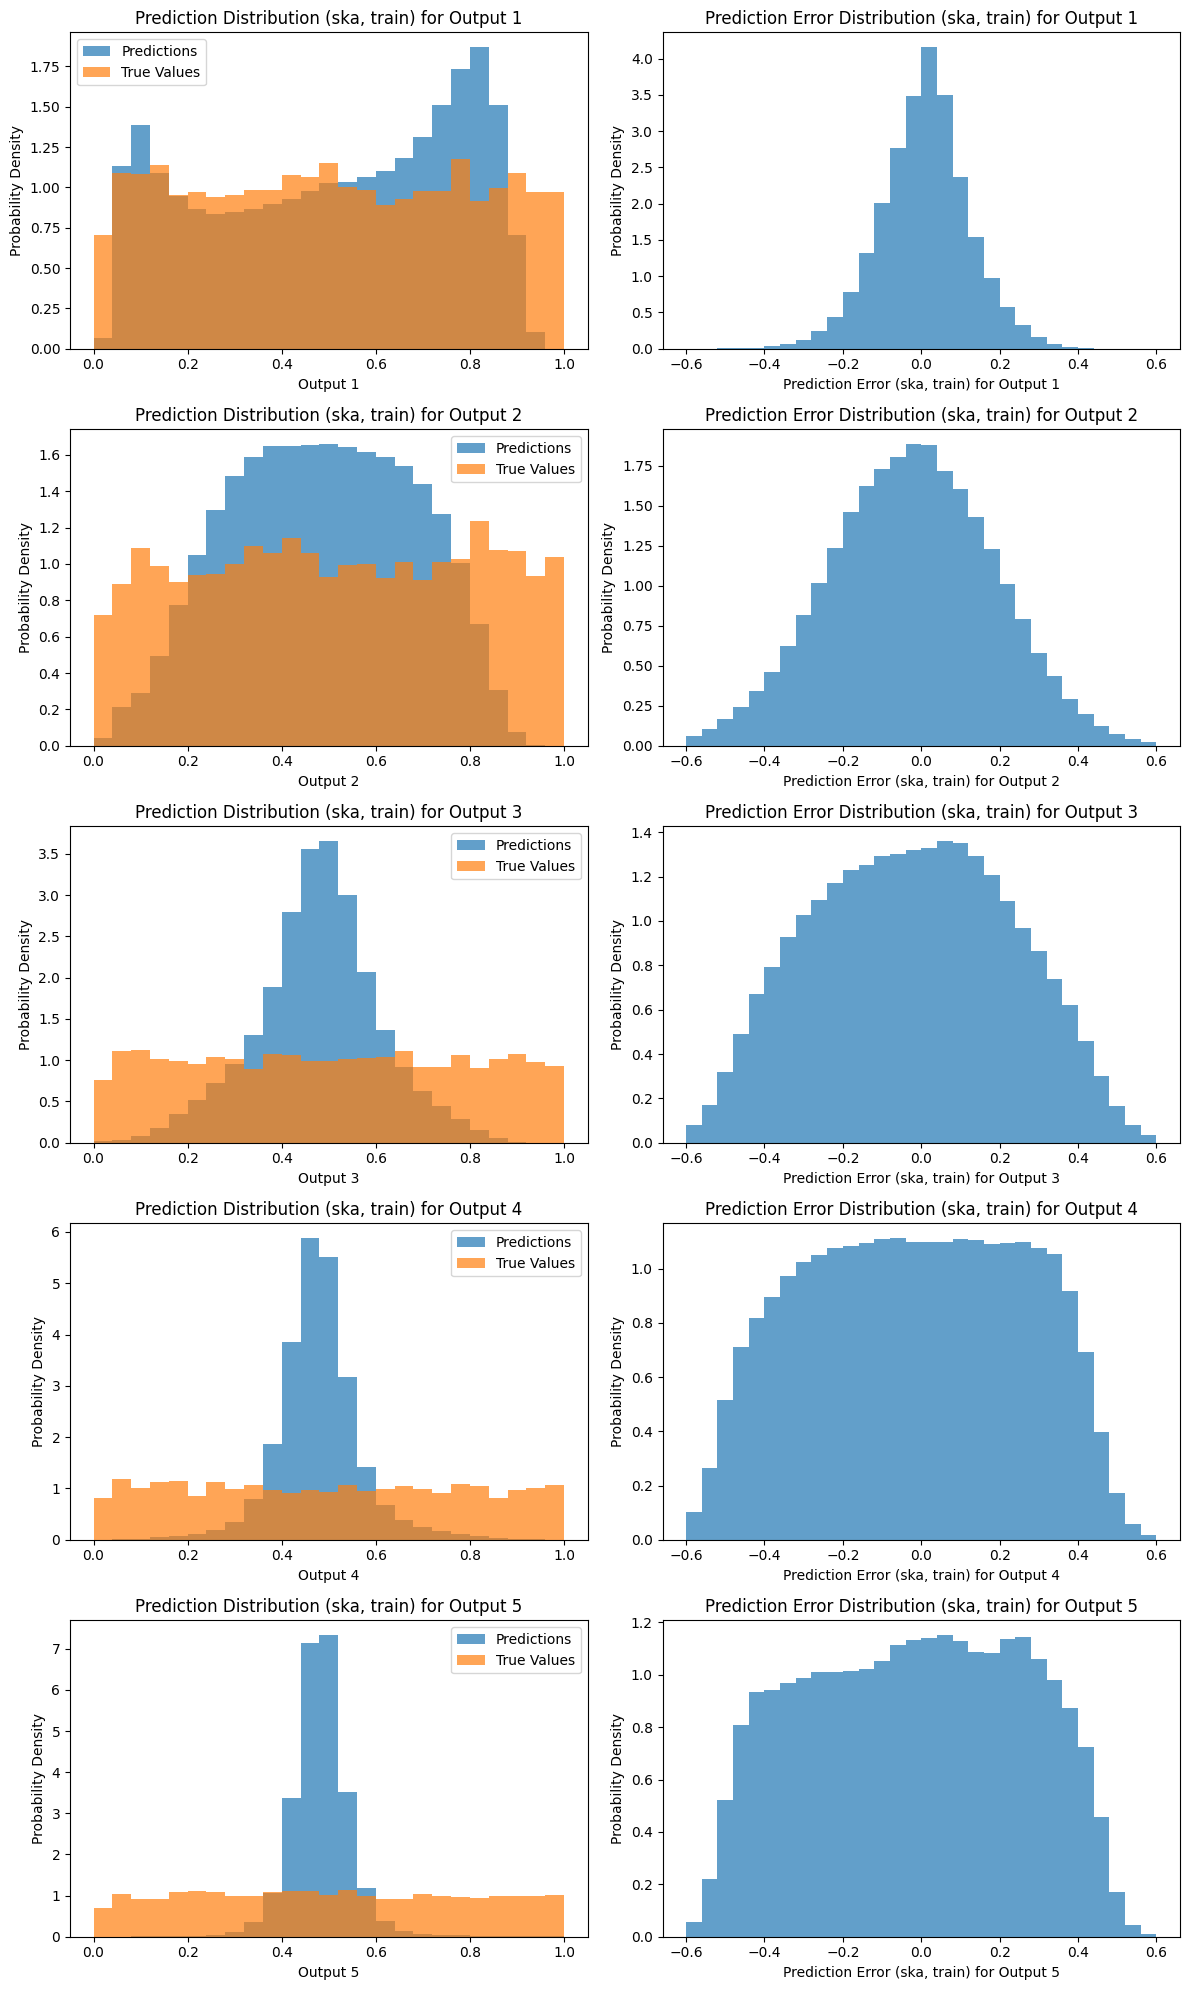

       Output_1_Error  Output_2_Error  Output_3_Error  Output_4_Error  \
count   380000.000000   380000.000000   380000.000000   380000.000000   
mean         0.008574       -0.025637       -0.022926       -0.019108   
std          0.113647        0.209459        0.252547        0.275165   
min         -0.660405       -0.865140       -0.821226       -0.799092   
25%         -0.061166       -0.168788       -0.218276       -0.244588   
50%          0.011842       -0.023114       -0.019933       -0.016029   
75%          0.077322        0.119395        0.168779        0.211743   
max          0.567672        0.776166        0.762650        0.773249   

       Output_5_Error  
count   380000.000000  
mean        -0.018561  
std          0.274985  
min         -0.746472  
25%         -0.248571  
50%         -0.010867  
75%          0.212397  
max          0.794890  


In [ ]:
# --- ska model on train data ---
y_pred_ska_train = model_ska.predict(x_train_ska_tensor)  # Assuming you have x_train_tensor for ska
prediction_errors_ska_train = y_pred_ska_train - y_train_ska_tensor.numpy()
num_outputs = y_train_ska_tensor.shape[1]

fig, axes = plt.subplots(num_outputs, 2, figsize=(12, num_outputs * 4))
prediction_bins = np.linspace(0.0, 1.0, 25 + 1)
error_bins = np.linspace(-0.6, 0.6, 30 + 1)

for i in range(num_outputs):
    axes[i, 0].hist(y_pred_ska_train[:, i], bins=prediction_bins, alpha=0.7, label="Predictions", density=True)
    axes[i, 0].hist(y_train_ska_tensor.numpy()[:, i], bins=prediction_bins, alpha=0.7, label="True Values", density=True)
    axes[i, 0].set_xlabel(f"Output {i + 1}")
    axes[i, 0].set_ylabel("Probability Density")
    axes[i, 0].set_title(f"Prediction Distribution (ska, train) for Output {i + 1}")
    axes[i, 0].legend()

    axes[i, 1].hist(prediction_errors_ska_train[:, i], bins=error_bins, alpha=0.7, density=True)
    axes[i, 1].set_xlabel(f"Prediction Error (ska, train) for Output {i + 1}")
    axes[i, 1].set_ylabel("Probability Density")
    axes[i, 1].set_title(f"Prediction Error Distribution (ska, train) for Output {i + 1}")

plt.tight_layout()
plt.show()

df_prediction_errors_ska_train = pd.DataFrame(prediction_errors_ska_train)
df_prediction_errors_ska_train.columns = [f"Output_{i+1}_Error" for i in range(num_outputs)]
print(df_prediction_errors_ska_train.describe())

# Cross crust predictions

In [ ]:
data_sly_cc = h5py.File(f"{location}/nndata_sly_cc.h5", "r")
data_ska_cc = h5py.File(f"{location}/nndata_ska_cc.h5", "r")
mrdata_sly_cc = h5py.File(f"{location}/mrdiagram_sly_cc.h5", "r")
mrdata_ska_cc = h5py.File(f"{location}/mrdiagram_ska_cc.h5", "r")

neos = 2000
data_sly_cc = np.array(data_sly_cc["data"][:,0:neos*100])
data_ska_cc = np.array(data_ska_cc["data"][:,0:neos*100])
part1_sly_cc = np.array(mrdata_sly_cc["mrdiagram_part1"][:,:,:].T)
part1_ska_cc = np.array(mrdata_ska_cc["mrdiagram_part1"][:,:,:].T)

print(data_sly_cc.shape)
print(data_ska_cc.shape)
print(part1_sly_cc.shape)
print(part1_ska_cc.shape)

(61, 200000)
(61, 200000)
(2000, 100, 3)
(2000, 100, 3)


## Histogram plots

In [ ]:
import numpy as np
import tensorflow as tf

# Assuming data_sly_cc, data_ska_cc, model_sly, and model_ska are already loaded

neos = 2000  # Number of EOSs

# --- Predictions for sly model on ska data ---
ska_input_all = data_ska_cc[:, :].T[:, :56] # Extract all ska input data
ska_output_all = data_ska_cc[:, :].T[:, 56:] # Extract all ska output data

sly_predictions_on_ska_all = model_sly.predict(tf.convert_to_tensor(ska_input_all), verbose=0)

sly_predictions_on_ska_mean = []
sly_predictions_on_ska_std = []
sly_errors_on_ska_mean = []
sly_errors_on_ska_std = []

ska_predictions_on_ska_all = model_ska.predict(tf.convert_to_tensor(ska_input_all), verbose=0)

ska_predictions_on_ska_mean = []
ska_predictions_on_ska_std = []
ska_errors_on_ska_mean = []
ska_errors_on_ska_std = []

for i in range(neos):
    # Extract predictions and errors for the current chunk
    predictions_chunk = sly_predictions_on_ska_all[i * 100 : (i + 1) * 100]
    errors_chunk = predictions_chunk - ska_output_all[i * 100 : (i + 1) * 100]

    # Calculate and store statistics for the chunk
    sly_predictions_on_ska_mean.append(np.mean(predictions_chunk, axis=0))
    sly_predictions_on_ska_std.append(np.std(predictions_chunk, axis=0))
    sly_errors_on_ska_mean.append(np.mean(errors_chunk, axis=0))
    sly_errors_on_ska_std.append(np.std(errors_chunk, axis=0))

for i in range(neos):
    predictions_chunk = ska_predictions_on_ska_all[i * 100 : (i + 1) * 100]
    errors_chunk = predictions_chunk - ska_output_all[i * 100 : (i + 1) * 100]

    ska_predictions_on_ska_mean.append(np.mean(predictions_chunk, axis=0))
    ska_predictions_on_ska_std.append(np.std(predictions_chunk, axis=0))
    ska_errors_on_ska_mean.append(np.mean(errors_chunk, axis=0))
    ska_errors_on_ska_std.append(np.std(errors_chunk, axis=0))

# Convert to arrays
sly_predictions_on_ska_mean = np.array(sly_predictions_on_ska_mean)
sly_predictions_on_ska_std = np.array(sly_predictions_on_ska_std)
sly_errors_on_ska_mean = np.array(sly_errors_on_ska_mean)
sly_errors_on_ska_std = np.array(sly_errors_on_ska_std)

ska_predictions_on_ska_mean = np.array(ska_predictions_on_ska_mean)
ska_predictions_on_ska_std = np.array(ska_predictions_on_ska_std)
ska_errors_on_ska_mean = np.array(ska_errors_on_ska_mean)
ska_errors_on_ska_std = np.array(ska_errors_on_ska_std)

# --- Predictions for ska model on sly data (similar structure) ---
sly_input_all = data_sly_cc[:, :].T[:, :56] # Extract all sly input data
sly_output_all = data_sly_cc[:, :].T[:, 56:] # Extract all sly output data

ska_predictions_on_sly_all = model_ska.predict(tf.convert_to_tensor(sly_input_all), verbose=0)

ska_predictions_on_sly_mean = []
ska_predictions_on_sly_std = []
ska_errors_on_sly_mean = []
ska_errors_on_sly_std = []

sly_predictions_on_sly_all = model_sly.predict(tf.convert_to_tensor(sly_input_all), verbose=0)

sly_predictions_on_sly_mean = []
sly_predictions_on_sly_std = []
sly_errors_on_sly_mean = []
sly_errors_on_sly_std = []

for i in range(neos):
    # Extract predictions and errors for the current chunk
    predictions_chunk = ska_predictions_on_sly_all[i * 100 : (i + 1) * 100]
    errors_chunk = predictions_chunk - sly_output_all[i * 100 : (i + 1) * 100]

    # Calculate and store statistics for the chunk
    ska_predictions_on_sly_mean.append(np.mean(predictions_chunk, axis=0))
    ska_predictions_on_sly_std.append(np.std(predictions_chunk, axis=0))
    ska_errors_on_sly_mean.append(np.mean(errors_chunk, axis=0))
    ska_errors_on_sly_std.append(np.std(errors_chunk, axis=0))

for i in range(neos):
    predictions_chunk = sly_predictions_on_sly_all[i * 100 : (i + 1) * 100]
    errors_chunk = predictions_chunk - sly_output_all[i * 100 : (i + 1) * 100]

    sly_predictions_on_sly_mean.append(np.mean(predictions_chunk, axis=0))
    sly_predictions_on_sly_std.append(np.std(predictions_chunk, axis=0))
    sly_errors_on_sly_mean.append(np.mean(errors_chunk, axis=0))
    sly_errors_on_sly_std.append(np.std(errors_chunk, axis=0))

# Convert to arrays
ska_predictions_on_sly_mean = np.array(ska_predictions_on_sly_mean)
ska_predictions_on_sly_std = np.array(ska_predictions_on_sly_std)
ska_errors_on_sly_mean = np.array(ska_errors_on_sly_mean)
ska_errors_on_sly_std = np.array(ska_errors_on_sly_std)

sly_predictions_on_sly_mean = np.array(sly_predictions_on_sly_mean)
sly_predictions_on_sly_std = np.array(sly_predictions_on_sly_std)
sly_errors_on_sly_mean = np.array(sly_errors_on_sly_mean)
sly_errors_on_sly_std = np.array(sly_errors_on_sly_std)

# Print shapes for verification
print("Shape of sly_predictions_on_ska_mean:", sly_predictions_on_ska_mean.shape)
print("Shape of sly_predictions_on_ska_std:", sly_predictions_on_ska_std.shape)
print("Shape of sly_errors_on_ska_mean:", sly_errors_on_ska_mean.shape)
print("Shape of sly_errors_on_ska_std:", sly_errors_on_ska_std.shape)
print()
print("Shape of ska_predictions_on_ska_mean:", ska_predictions_on_ska_mean.shape)
print("Shape of ska_predictions_on_ska_std:", ska_predictions_on_ska_std.shape)
print("Shape of ska_errors_on_ska_mean:", ska_errors_on_ska_mean.shape)
print("Shape of ska_errors_on_ska_std:", ska_errors_on_ska_std.shape)
print()
print("Shape of ska_predictions_on_sly_mean:", ska_predictions_on_sly_mean.shape)
print("Shape of ska_predictions_on_sly_std:", ska_predictions_on_sly_std.shape)
print("Shape of ska_errors_on_sly_mean:", ska_errors_on_sly_mean.shape)
print("Shape of ska_errors_on_sly_std:", ska_errors_on_sly_std.shape)
print()
print("Shape of sly_predictions_on_sly_mean:", sly_predictions_on_sly_mean.shape)
print("Shape of sly_predictions_on_sly_std:", sly_predictions_on_sly_std.shape)
print("Shape of sly_errors_on_sly_mean:", sly_errors_on_sly_mean.shape)
print("Shape of sly_errors_on_sly_std:", sly_errors_on_sly_std.shape)

Shape of sly_predictions_on_ska_mean: (2000, 5)
Shape of sly_predictions_on_ska_std: (2000, 5)
Shape of sly_errors_on_ska_mean: (2000, 5)
Shape of sly_errors_on_ska_std: (2000, 5)

Shape of ska_predictions_on_ska_mean: (2000, 5)
Shape of ska_predictions_on_ska_std: (2000, 5)
Shape of ska_errors_on_ska_mean: (2000, 5)
Shape of ska_errors_on_ska_std: (2000, 5)

Shape of ska_predictions_on_sly_mean: (2000, 5)
Shape of ska_predictions_on_sly_std: (2000, 5)
Shape of ska_errors_on_sly_mean: (2000, 5)
Shape of ska_errors_on_sly_std: (2000, 5)

Shape of sly_predictions_on_sly_mean: (2000, 5)
Shape of sly_predictions_on_sly_std: (2000, 5)
Shape of sly_errors_on_sly_mean: (2000, 5)
Shape of sly_errors_on_sly_std: (2000, 5)


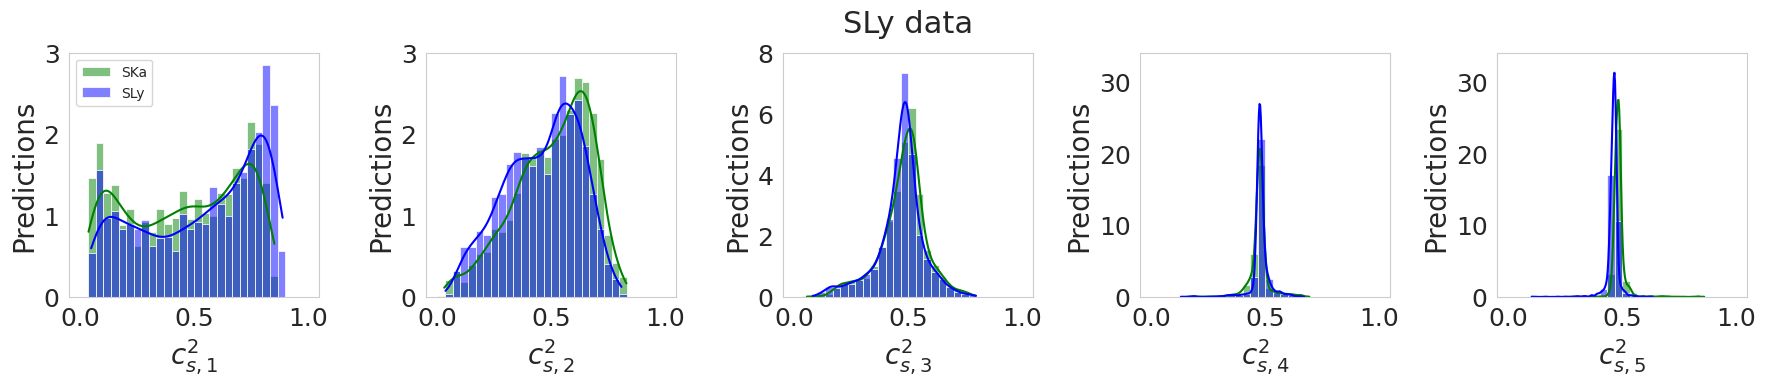

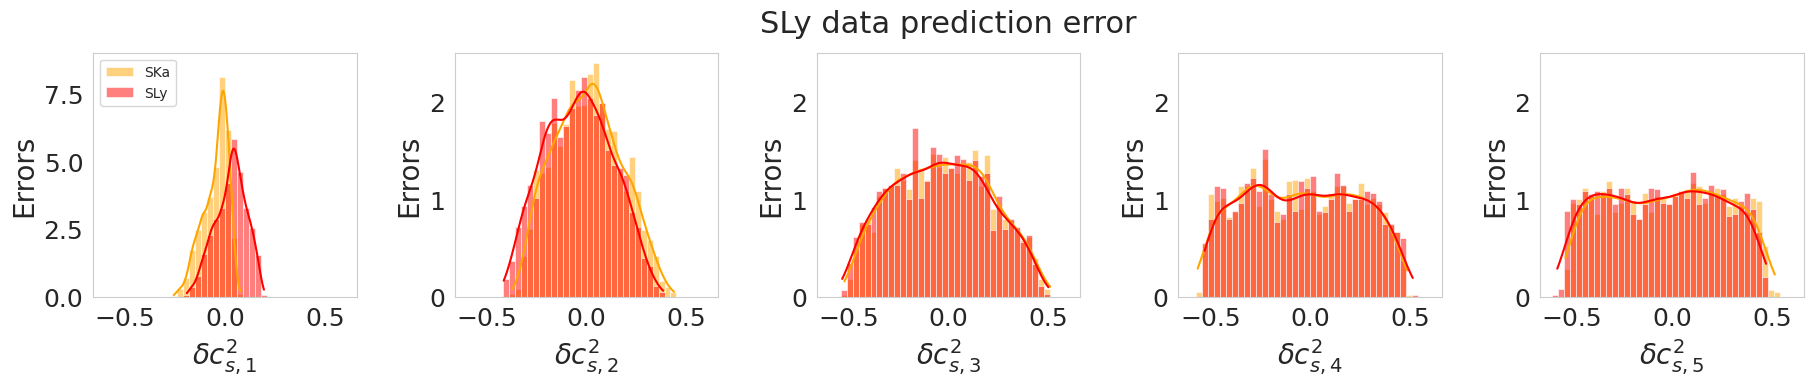

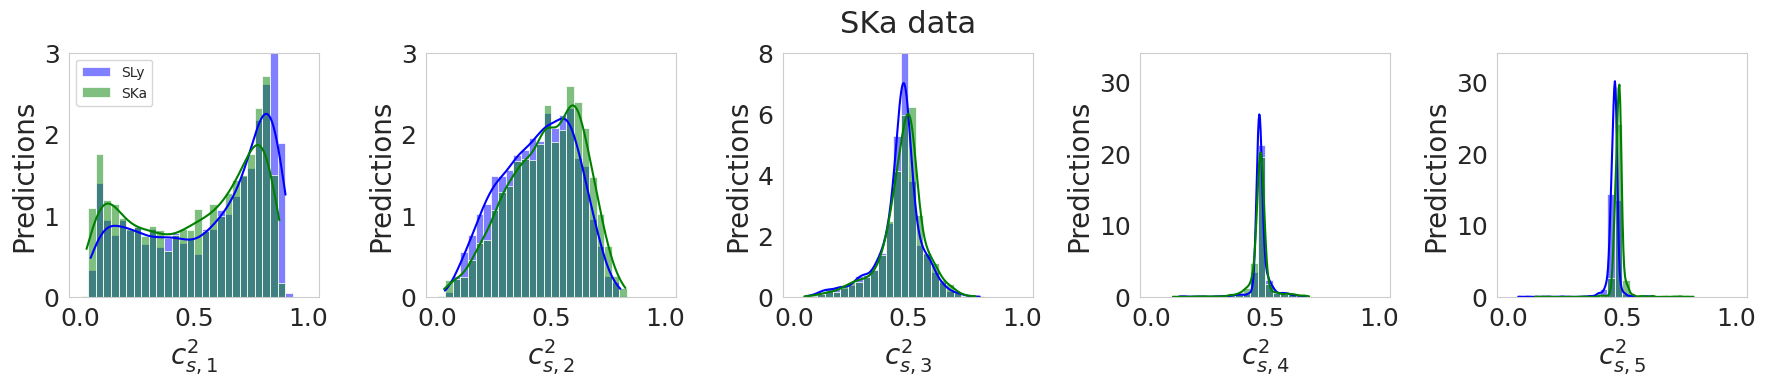

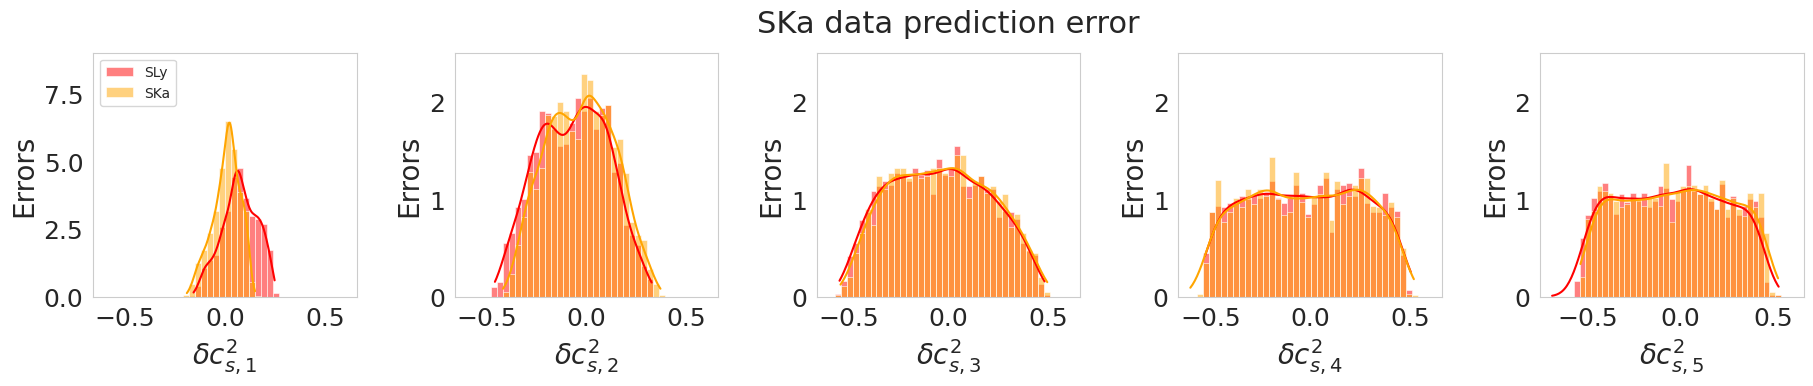

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ... (get_ellipse function and previous code) ...

def plot_cross_crust_predictions(sly_predictions_on_ska_mean, sly_errors_on_ska_mean,
                                 ska_predictions_on_sly_mean, ska_errors_on_sly_mean,
                                 sly_predictions_on_sly_mean, sly_errors_on_sly_mean,
                                 ska_predictions_on_ska_mean, ska_errors_on_ska_mean,
                                 num_outputs=5):
    """
    Plots histograms of cross-crust predictions and errors for sly and ska models
    as separate plots for each row, with titles for the rows.
    Includes SLy on SLy and SKA on SKA plots.
    """

    sns.set_style("whitegrid")
    sns.set_palette("bright")

    # Define bin edges
    prediction_bins = np.linspace(0.0, 1.0, 30 + 1)
    error_bins = np.linspace(-0.6, 0.6, 40 + 1)

    # Data, labels, and row titles
    data_rows = [
        ([(ska_predictions_on_sly_mean, "green", "SKa"), (sly_predictions_on_sly_mean, "blue", "SLy")],
         "Predictions on SLy data", prediction_bins, "Predictions"),
        ([(ska_errors_on_sly_mean, "orange", "SKa"), (sly_errors_on_sly_mean, "red", "SLy")],
         "Errors on SLy data", error_bins, "Errors"),
        ([(sly_predictions_on_ska_mean, "blue", "SLy"), (ska_predictions_on_ska_mean, "green", "SKa")],
         "Predictions on SKA data", prediction_bins, "Predictions"),
        ([(sly_errors_on_ska_mean, "red", "SLy"), (ska_errors_on_ska_mean, "orange", "SKa")],
         "Errors on SKA data", error_bins, "Errors")
    ]
    row_titles = ["SLy data", "SLy data prediction error", "SKa data", "SKa data prediction error"]

    for row_index, (data_list, row_title, bins, ylabel) in enumerate(data_rows):
        fig, axes = plt.subplots(1, num_outputs, figsize=(18, 4))

        for output_index in range(num_outputs):
            ax = axes[output_index]

            for data, color, label in data_list:
                if output_index == 0:
                    sns.histplot(data[:, output_index], bins=bins, ax=ax,
                             kde=True, stat="density", color=color, label=label)
                else:
                    sns.histplot(data[:, output_index], bins=bins, ax=ax,
                             kde=True, stat="density", color=color)

            ax.set_ylabel(ylabel, fontsize=20)
            ax.grid(False)
            ax.tick_params(axis="both", labelsize=18)
            if row_index % 2 == 0:
                if output_index == 0 or output_index == 1:
                    ax.set_ylim(0, 3.0)
                elif output_index == 2:
                    ax.set_ylim(0.0, 8.0)
                elif output_index == 3 or output_index == 4:
                    ax.set_ylim(0.0, 34.0)
            else:
                if output_index == 0:
                    ax.set_ylim(0, 9.0)
                elif output_index == 1 or output_index == 2 or output_index == 3 or output_index == 4:
                    ax.set_ylim(0.0, 2.5)

            xlabel = f"$c_{{s,{output_index + 1}}}^2$"
            if "Error" in ylabel:
                xlabel = f"$\delta c_{{s,{output_index + 1}}}^2$"
            ax.set_xlabel(xlabel, fontsize=20)
            if output_index == 0:
                ax.legend(loc="upper left")

        axes[2].set_title(row_titles[row_index], fontsize=22, y=1.05)
        # fig.suptitle(row_title, fontsize=16, y=1.05)
        plt.tight_layout()
        plt.show()
        fig.savefig(f"{location}/cc_pred_row_{row_index+1}.pdf")

# Call the function with your data (updated)
plot_cross_crust_predictions(sly_predictions_on_ska_mean, sly_errors_on_ska_mean,
                             ska_predictions_on_sly_mean, ska_errors_on_sly_mean,
                             sly_predictions_on_sly_mean, sly_errors_on_sly_mean,  # Added for SLy on SLy
                             ska_predictions_on_ska_mean, ska_errors_on_ska_mean) # Added for SKA on SKA

## EoS reconstruction

In [ ]:
import numpy as np

# Assuming data_sly_cc is already loaded

def find_increasing_eos_from_data(data):
    """
    Finds an EOS index (i_sly) where the output data only increases
    from a lower number near zero.

    Args:
        data: The EOS data (data_sly_cc).

    Returns:
        An EOS index (i_sly) or None if no such EOS is found.
    """

    neos = data.shape[0] // 100  # Number of EOSs

    for i_sly in range(neos):
        output_data = data[i_sly * 100, 56:61]

        # Check all three conditions
        if (np.all(np.diff(output_data) > 0) and
            output_data[0] < 0.3 and
            0.3 < output_data[-1] < 0.9):  # New condition for ending value
            return i_sly

    return None

# Find i_sly
i_sly = find_increasing_eos_from_data(data_sly_cc.T)
print(i_sly)
print(data_sly_cc.T[i_sly*100,56:61])

i_ska = find_increasing_eos_from_data(data_ska_cc.T)
print(i_ska)
print(data_ska_cc.T[i_ska*100,56:61])


936
[0.17249813 0.35552984 0.41584958 0.74489004 0.79071351]
35
[0.26524126 0.53041585 0.61413169 0.67665764 0.873873  ]


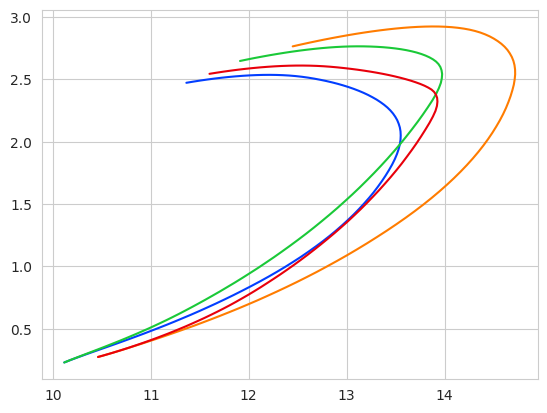

In [ ]:
# for i in range(20):
i_sly2 = 8
i_ska2 = 44
#     plt.plot(part1_ska_cc[i,:,2], part1_ska_cc[i,:,1])
plt.plot(part1_sly_cc[i_sly,:,2], part1_sly_cc[i_sly,:,1])
plt.plot(part1_ska_cc[i_ska,:,2], part1_ska_cc[i_ska,:,1])
plt.plot(part1_sly_cc[i_sly2,:,2], part1_sly_cc[i_sly2,:,1])
plt.plot(part1_ska_cc[i_ska2,:,2], part1_ska_cc[i_ska2,:,1])

plt.show()

In [ ]:
nnpred_sly_cc = model_ska.predict(tf.convert_to_tensor(data_sly_cc.T[i_sly*100:(i_sly+1)*100,0:56]))
nnpred_ska_cc = model_sly.predict(tf.convert_to_tensor(data_ska_cc.T[i_ska*100:(i_ska+1)*100,0:56]))
nnpred_sly_cc2 = model_ska.predict(tf.convert_to_tensor(data_sly_cc.T[i_sly2*100:(i_sly2+1)*100,0:56]))
nnpred_ska_cc2 = model_sly.predict(tf.convert_to_tensor(data_ska_cc.T[i_ska2*100:(i_ska2+1)*100,0:56]))

nnpred_slysly_cc = model_sly.predict(tf.convert_to_tensor(data_sly_cc.T[i_sly*100:(i_sly+1)*100,0:56]))
nnpred_skaska_cc = model_ska.predict(tf.convert_to_tensor(data_ska_cc.T[i_ska*100:(i_ska+1)*100,0:56]))
nnpred_slysly_cc2 = model_sly.predict(tf.convert_to_tensor(data_sly_cc.T[i_sly2*100:(i_sly2+1)*100,0:56]))
nnpred_skaska_cc2 = model_ska.predict(tf.convert_to_tensor(data_ska_cc.T[i_ska2*100:(i_ska2+1)*100,0:56]))

original_sly_cc = data_sly_cc.T[i_sly*100,56:61]
original_ska_cc = data_ska_cc.T[i_ska*100,56:61]
original_sly_cc2 = data_sly_cc.T[i_sly2*100,56:61]
original_ska_cc2 = data_ska_cc.T[i_ska2*100,56:61]

nnpred_sly_cc_mean = np.mean(nnpred_sly_cc, axis=0)
nnpred_ska_cc_mean = np.mean(nnpred_ska_cc, axis=0)
nn_pred_sly_cc_std = np.std(nnpred_sly_cc, axis=0)
nn_pred_ska_cc_std = np.std(nnpred_ska_cc, axis=0)
nnpred_slysly_cc_mean = np.mean(nnpred_slysly_cc, axis=0)
nnpred_skaska_cc_mean = np.mean(nnpred_skaska_cc, axis=0)

nnpred_sly_cc_mean2 = np.mean(nnpred_sly_cc2, axis=0)
nnpred_ska_cc_mean2 = np.mean(nnpred_ska_cc2, axis=0)
nn_pred_sly_cc_std2 = np.std(nnpred_sly_cc2, axis=0)
nn_pred_ska_cc_std2 = np.std(nnpred_ska_cc2, axis=0)
nnpred_slysly_cc_mean2 = np.mean(nnpred_slysly_cc2, axis=0)
nnpred_skaska_cc_mean2 = np.mean(nnpred_skaska_cc2, axis=0)

print(f"Original sly: [{original_sly_cc[0]}, {original_sly_cc[1]}, {original_sly_cc[2]}, {original_sly_cc[3]}, {original_sly_cc[4]}]")
print(f"Original ska: [{original_ska_cc[0]}, {original_ska_cc[1]}, {original_ska_cc[2]}, {original_ska_cc[3]}, {original_ska_cc[4]}]")
print(f"Reconstructed ska on sly: [{nnpred_sly_cc_mean[0]}, {nnpred_sly_cc_mean[1]}, {nnpred_sly_cc_mean[2]}, {nnpred_sly_cc_mean[3]}, {nnpred_sly_cc_mean[4]}]")
print(f"Reconstructed sly on ska: [{nnpred_ska_cc_mean[0]}, {nnpred_ska_cc_mean[1]}, {nnpred_ska_cc_mean[2]}, {nnpred_ska_cc_mean[3]}, {nnpred_ska_cc_mean[4]}]")
print(f"Reconstructed sly on sly: [{nnpred_slysly_cc_mean[0]}, {nnpred_slysly_cc_mean[1]}, {nnpred_slysly_cc_mean[2]}, {nnpred_slysly_cc_mean[3]}, {nnpred_slysly_cc_mean[4]}]")
print(f"Reconstructed ska on ska: [{nnpred_skaska_cc_mean[0]}, {nnpred_skaska_cc_mean[1]}, {nnpred_skaska_cc_mean[2]}, {nnpred_skaska_cc_mean[3]}, {nnpred_skaska_cc_mean[4]}]")

print()

print(f"Original sly: [{original_sly_cc2[0]}, {original_sly_cc2[1]}, {original_sly_cc2[2]}, {original_sly_cc2[3]}, {original_sly_cc2[4]}]")
print(f"Original ska: [{original_ska_cc2[0]}, {original_ska_cc2[1]}, {original_ska_cc2[2]}, {original_ska_cc2[3]}, {original_ska_cc2[4]}]")
print(f"Reconstructed ska on sly: [{nnpred_sly_cc_mean2[0]}, {nnpred_sly_cc_mean2[1]}, {nnpred_sly_cc_mean2[2]}, {nnpred_sly_cc_mean2[3]}, {nnpred_sly_cc_mean2[4]}]")
print(f"Reconstructed sly on ska: [{nnpred_ska_cc_mean2[0]}, {nnpred_ska_cc_mean2[1]}, {nnpred_ska_cc_mean2[2]}, {nnpred_ska_cc_mean2[3]}, {nnpred_ska_cc_mean2[4]}]")
print(f"Reconstructed sly on sly: [{nnpred_slysly_cc_mean2[0]}, {nnpred_slysly_cc_mean2[1]}, {nnpred_slysly_cc_mean2[2]}, {nnpred_slysly_cc_mean2[3]}, {nnpred_slysly_cc_mean2[4]}]")
print(f"Reconstructed ska on ska: [{nnpred_skaska_cc_mean2[0]}, {nnpred_skaska_cc_mean2[1]}, {nnpred_skaska_cc_mean2[2]}, {nnpred_skaska_cc_mean2[3]}, {nnpred_skaska_cc_mean2[4]}]")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Original sly: [0.1724981255092443, 0.3555298403812845, 0.41584958349732704, 0.7448900441554279, 0.7907135117660651]
Original ska: [0.2652412580458028, 0.5304158486149873, 0.6141316850926819, 0.6766576429118921, 0.8738729952286546]
Reconstructed ska on sly: [0.13091395795345306, 0.3943404257297516, 0.4834774136543274, 0.5123230814933777, 0.4966156482696533]
Reconstructed sly on ska: [0.36336299777030945, 0.488743394613266, 0.5241061449050903, 0.48612281680107117, 0.4489303529262543]
Reconstructed sly on sly: [0.1857769787311554, 0.34744206070899963, 0.5139628648757935, 0.5123903751373291, 0.4659605026245117]
Reconstructed ska on ska: [0.26954329013824463, 0.5659922361373901, 0.535614907

In [ ]:
eosfile_sly_cc = h5py.File(f"{location}/eos_sly_cc.h5", "r")
eosfile_ska_cc = h5py.File(f"{location}/eos_ska_cc.h5", "r")

eosdata_sly_cc = eosfile_sly_cc["eos"][:].T
eosdata_ska_cc = eosfile_ska_cc["eos"][:].T

print(eosdata_sly_cc.shape)
print(eosdata_ska_cc.shape)

P_sly_cc_1 = eosdata_sly_cc[i_sly,:,0]
e_sly_cc_1 = eosdata_sly_cc[i_sly,:,1]
P_ska_cc_1 = eosdata_ska_cc[i_ska,:,0]
e_ska_cc_1 = eosdata_ska_cc[i_ska,:,1]

P_sly_cc_2 = eosdata_sly_cc[i_sly2,:,0]
e_sly_cc_2 = eosdata_sly_cc[i_sly2,:,1]
P_ska_cc_2 = eosdata_ska_cc[i_ska2,:,0]
e_ska_cc_2 = eosdata_ska_cc[i_ska2,:,1]

print(P_sly_cc_1.shape)
print(e_sly_cc_1.shape)
print(P_ska_cc_1.shape)
print(e_ska_cc_1.shape)

(2000, 1200, 3)
(2000, 1200, 3)
(1200,)
(1200,)
(1200,)
(1200,)


In [ ]:
predeosfile_sly_cc_1 = h5py.File(f"{location}/eosreconstructed_sly_1.h5", "r")
predeosfile_ska_cc_1 = h5py.File(f"{location}/eosreconstructed_ska_1.h5", "r")
predeosfile_slysly_cc_1 = h5py.File(f"{location}/eosreconstructed_slysly_1.h5", "r")
predeosfile_skaska_cc_1 = h5py.File(f"{location}/eosreconstructed_skaska_1.h5", "r")
predeosfile_sly_cc_2 = h5py.File(f"{location}/eosreconstructed_sly_2.h5", "r")
predeosfile_ska_cc_2 = h5py.File(f"{location}/eosreconstructed_ska_2.h5", "r")
predeosfile_slysly_cc_2 = h5py.File(f"{location}/eosreconstructed_slysly_2.h5", "r")
predeosfile_skaska_cc_2 = h5py.File(f"{location}/eosreconstructed_skaska_2.h5", "r")

pdata_sly_cc_1 = predeosfile_sly_cc_1["eos"][:].T
pdata_ska_cc_1 = predeosfile_ska_cc_1["eos"][:].T
pdata_slysly_cc_1 = predeosfile_slysly_cc_1["eos"][:].T
pdata_skaska_cc_1 = predeosfile_skaska_cc_1["eos"][:].T
pdata_sly_cc_2 = predeosfile_sly_cc_2["eos"][:].T
pdata_ska_cc_2 = predeosfile_ska_cc_2["eos"][:].T
pdata_slysly_cc_2 = predeosfile_slysly_cc_2["eos"][:].T
pdata_skaska_cc_2 = predeosfile_skaska_cc_2["eos"][:].T

print(pdata_sly_cc_1.shape)
print(pdata_ska_cc_1.shape)
print(pdata_slysly_cc_1.shape)
print(pdata_skaska_cc_1.shape)
print(pdata_sly_cc_2.shape)
print(pdata_ska_cc_2.shape)
print(pdata_slysly_cc_2.shape)
print(pdata_skaska_cc_2.shape)

predP_sly_cc_1 = pdata_sly_cc_1[:,0]
prede_sly_cc_1 = pdata_sly_cc_1[:,1]
predP_slysly_cc_1 = pdata_slysly_cc_1[:,0]
prede_slysly_cc_1 = pdata_slysly_cc_1[:,1]
predP_ska_cc_1 = pdata_ska_cc_1[:,0]
prede_ska_cc_1 = pdata_ska_cc_1[:,1]
predP_skaska_cc_1 = pdata_skaska_cc_1[:,0]
prede_skaska_cc_1 = pdata_skaska_cc_1[:,1]

predP_sly_cc_2 = pdata_sly_cc_2[:,0]
prede_sly_cc_2 = pdata_sly_cc_2[:,1]
predP_slysly_cc_2 = pdata_slysly_cc_2[:,0]
prede_slysly_cc_2 = pdata_slysly_cc_2[:,1]
predP_ska_cc_2 = pdata_ska_cc_2[:,0]
prede_ska_cc_2 = pdata_ska_cc_2[:,1]
predP_skaska_cc_2 = pdata_skaska_cc_2[:,0]
prede_skaska_cc_2 = pdata_skaska_cc_2[:,1]

print(predP_sly_cc_1.shape)
print(prede_sly_cc_1.shape)
print(predP_ska_cc_1.shape)
print(prede_ska_cc_1.shape)

(600, 4)
(600, 4)
(600, 4)
(600, 4)
(600, 4)
(600, 4)
(600, 4)
(600, 4)
(600,)
(600,)
(600,)
(600,)


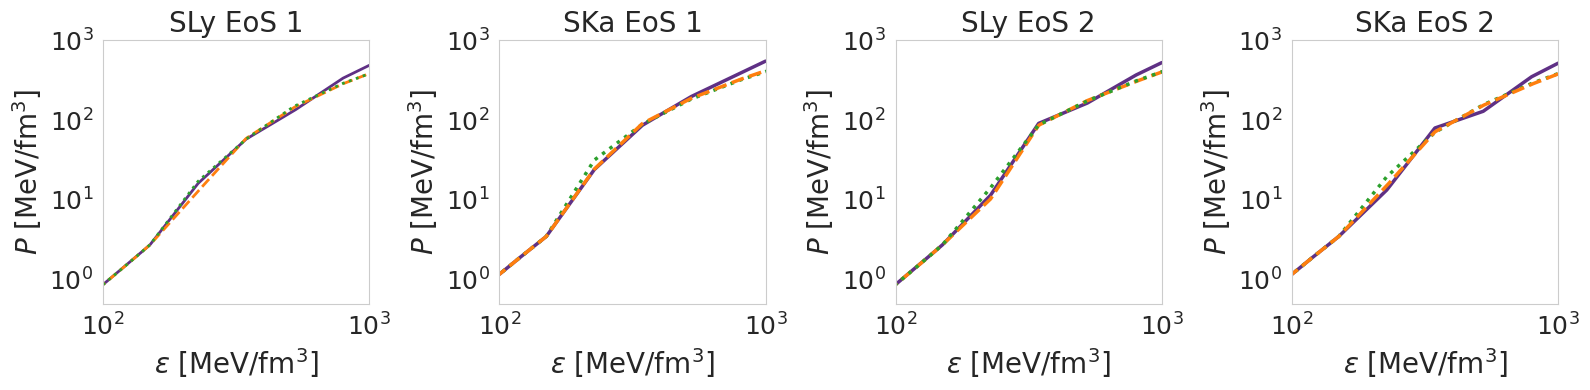

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# ... (Assuming all variables like e_ska_cc_2, P_ska_cc_2, etc., are already defined) ...

fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 2 rows, 2 columns of subplots

plt.grid(False)

colors = ["#5f3085", "tab:orange", "tab:green"]

# --- Top Left: SLy 1 ---
axes[0].plot(e_sly_cc_1, P_sly_cc_1, label="Original", linewidth=2, color=colors[0])
axes[0].plot(prede_sly_cc_1, predP_sly_cc_1, linestyle="--", label="SKa on SLy", linewidth=2, color=colors[1])
axes[0].plot(prede_slysly_cc_1, predP_slysly_cc_1, linestyle=":", label="SLy on SLy", linewidth=2, color=colors[2])
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlim(1e2, 1e3)
axes[0].set_ylim(5e-1, 1e3)
axes[0].set_xlabel("$\epsilon$ [MeV/fm$^3$]", fontsize=20)
axes[0].set_ylabel("$P$ [MeV/fm$^3$]", fontsize=20)
axes[0].tick_params(axis="both", labelsize=18)
axes[0].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=12))
axes[0].xaxis.set_minor_formatter(ticker.NullFormatter())
axes[0].grid(False)
axes[0].set_title("SLy EoS 1", fontsize=20)  # Add subplot title
# axes[0, 0].legend()


# --- Top Right: SKA 1 ---
axes[1].plot(e_ska_cc_1, P_ska_cc_1, label="Original", linewidth=2.5, color=colors[0])
axes[1].plot(prede_ska_cc_1, predP_ska_cc_1, linestyle=":", label="SLy on SKa", linewidth=2.5, color=colors[2])
axes[1].plot(prede_skaska_cc_1, predP_skaska_cc_1, linestyle="--", label="SKa on SKa", linewidth=2.5, color=colors[1])
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlim(1e2, 1e3)
axes[1].set_ylim(5e-1, 1e3)
axes[1].set_xlabel("$\epsilon$ [MeV/fm$^3$]", fontsize=20)
axes[1].set_ylabel("$P$ [MeV/fm$^3$]", fontsize=20)
axes[1].tick_params(axis="both", labelsize=18)
axes[1].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=12))
axes[1].xaxis.set_minor_formatter(ticker.NullFormatter())
axes[1].grid(False)
axes[1].set_title("SKa EoS 1", fontsize=20)  # Add subplot title
# axes[0, 1].legend()


# --- Bottom Left: SLy 2 ---
axes[2].plot(e_sly_cc_2, P_sly_cc_2, label="Original", linewidth=2.5, color=colors[0])
axes[2].plot(prede_sly_cc_2, predP_sly_cc_2, linestyle="--", label="SKA on SLy", linewidth=2.5, color=colors[1])
axes[2].plot(prede_slysly_cc_2, predP_slysly_cc_2, linestyle=":", label="SLy on SLy", linewidth=2.5, color=colors[2])
axes[2].set_xscale("log")
axes[2].set_yscale("log")
axes[2].set_xlim(1e2, 1e3)
axes[2].set_ylim(5e-1, 1e3)
axes[2].set_xlabel("$\epsilon$ [MeV/fm$^3$]", fontsize=20)
axes[2].set_ylabel("$P$ [MeV/fm$^3$]", fontsize=20)
axes[2].tick_params(axis="both", labelsize=18)
axes[2].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=12))
axes[2].xaxis.set_minor_formatter(ticker.NullFormatter())
axes[2].grid(False)
axes[2].set_title("SLy EoS 2", fontsize=20)  # Add subplot title
# axes[1, 0].legend()


# --- Bottom Right: SKA 2 ---
axes[3].plot(e_ska_cc_2, P_ska_cc_2, label="Original", linewidth=2.5, color=colors[0])
axes[3].plot(prede_ska_cc_2, predP_ska_cc_2, linestyle=":", label="SLy on SKA", linewidth=2.5, color=colors[2])
axes[3].plot(prede_skaska_cc_2, predP_skaska_cc_2, linestyle="--", label="SKA on SKA", linewidth=2.5, color=colors[1])
axes[3].set_xscale("log")
axes[3].set_yscale("log")
axes[3].set_xlim(1e2, 1e3)
axes[3].set_ylim(5e-1, 1e3)
axes[3].set_xlabel("$\epsilon$ [MeV/fm$^3$]", fontsize=20)
axes[3].set_ylabel("$P$ [MeV/fm$^3$]", fontsize=20)
axes[3].tick_params(axis="both", labelsize=18)
axes[3].xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=12))
axes[3].xaxis.set_minor_formatter(ticker.NullFormatter())
axes[3].grid(False)
axes[3].set_title("SKa EoS 2", fontsize=20)  # Add subplot title
# axes[1, 1].legend()


plt.tight_layout()  # Adjust spacing between subplots
plt.show()
fig.savefig(f"{location}/eos_reconstructed.png")

In [ ]:
predmrfile_sly_cc_1 = h5py.File(f"{location}/mrreconstructed_sly_1.h5", "r")
predmrfile_ska_cc_1 = h5py.File(f"{location}/mrreconstructed_ska_1.h5", "r")
predmrfile_slysly_cc_1 = h5py.File(f"{location}/mrreconstructed_slysly_1.h5", "r")
predmrfile_skaska_cc_1 = h5py.File(f"{location}/mrreconstructed_skaska_1.h5", "r")
predmrfile_sly_cc_2 = h5py.File(f"{location}/mrreconstructed_sly_2.h5", "r")
predmrfile_ska_cc_2 = h5py.File(f"{location}/mrreconstructed_ska_2.h5", "r")
predmrfile_slysly_cc_2 = h5py.File(f"{location}/mrreconstructed_slysly_2.h5", "r")
predmrfile_skaska_cc_2 = h5py.File(f"{location}/mrreconstructed_skaska_2.h5", "r")

predmrdata_sly_cc_1 = predmrfile_sly_cc_1["mrdiagram"][:].T
predmrdata_ska_cc_1 = predmrfile_ska_cc_1["mrdiagram"][:].T
predmrdata_slysly_cc_1 = predmrfile_slysly_cc_1["mrdiagram"][:].T
predmrdata_skaska_cc_1 = predmrfile_skaska_cc_1["mrdiagram"][:].T
predmrdata_sly_cc_2 = predmrfile_sly_cc_2["mrdiagram"][:].T
predmrdata_ska_cc_2 = predmrfile_ska_cc_2["mrdiagram"][:].T
predmrdata_slysly_cc_2 = predmrfile_slysly_cc_2["mrdiagram"][:].T
predmrdata_skaska_cc_2 = predmrfile_skaska_cc_2["mrdiagram"][:].T

print(predmrdata_sly_cc_1.shape)
print(predmrdata_ska_cc_1.shape)
print(predmrdata_sly_cc_2.shape)
print(predmrdata_ska_cc_2.shape)

(100, 2)
(100, 2)
(100, 2)
(100, 2)


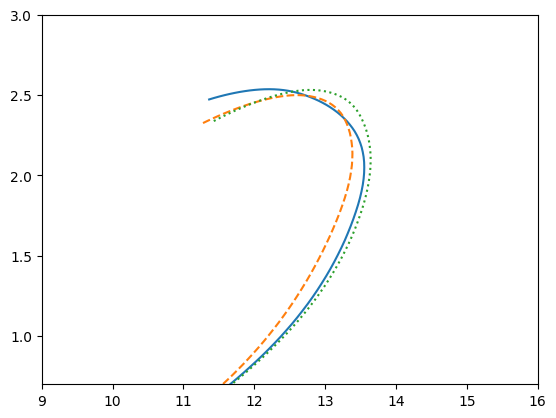

In [ ]:
plt.plot(part1_sly_cc[i_sly,:,2], part1_sly_cc[i_sly,:,1], label="Original")
plt.plot(predmrdata_sly_cc_1[:,1], predmrdata_sly_cc_1[:,0], linestyle="--", label="SKA on SLy")
plt.plot(predmrdata_slysly_cc_1[:,1], predmrdata_slysly_cc_1[:,0], linestyle=":", label="SLy on SLy")

plt.ylim(0.7, 3.0)
plt.xlim(9.0, 16.0)

plt.show()

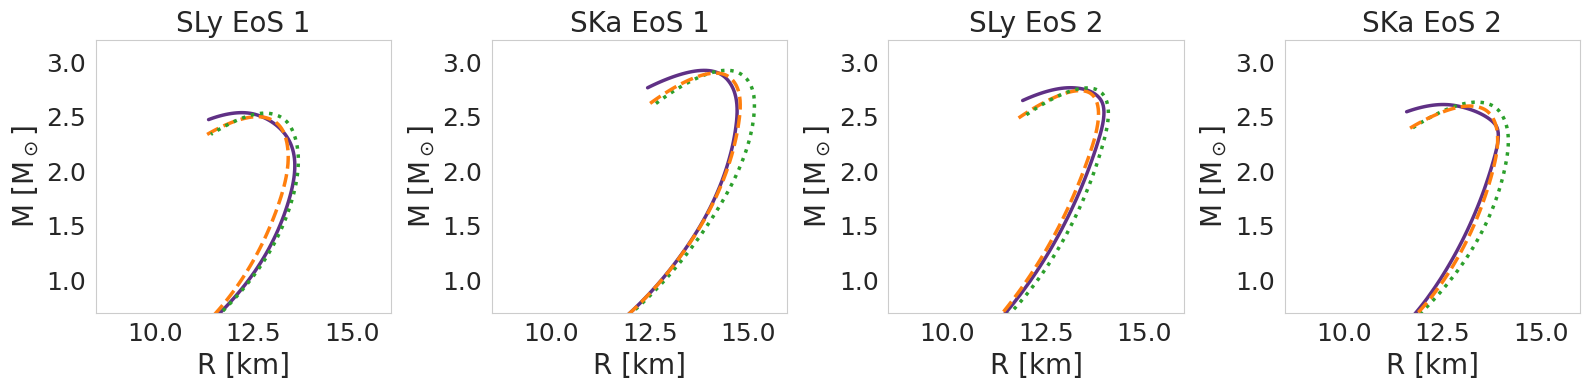

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming all necessary data is loaded and variables are defined

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

colors = ["#5f3085", "tab:orange", "tab:green"]

# --- Top Left: SLy 1 ---
axes[0].plot(part1_sly_cc[i_sly,:,2], part1_sly_cc[i_sly,:,1], label="Original", linewidth=2.5, color=colors[0])
axes[0].plot(predmrdata_sly_cc_1[:,1], predmrdata_sly_cc_1[:,0], linestyle="--", label="SKA on SLy", linewidth=2.5, color=colors[1])
axes[0].plot(predmrdata_slysly_cc_1[:,1], predmrdata_slysly_cc_1[:,0], linestyle=":", label="SLy on SLy", linewidth=2.5, color=colors[2])
axes[0].set_ylim(0.7, 3.2)
axes[0].set_xlim(8.5, 16.0)
axes[0].set_xlabel("R [km]", fontsize=20)
axes[0].set_ylabel("M [M$_\odot$]", fontsize=20)
axes[0].tick_params(axis="both", labelsize=18)
axes[0].set_title("SLy EoS 1", fontsize=20)
axes[0].grid(False)
# axes[0, 0].legend(loc="upper left")

# --- Top Right: SKA 1 ---
axes[1].plot(part1_ska_cc[i_ska,:,2], part1_ska_cc[i_ska,:,1], label="Original", linewidth=2.5, color=colors[0])
axes[1].plot(predmrdata_ska_cc_1[:,1], predmrdata_ska_cc_1[:,0], linestyle=":", label="SLy on SLy", linewidth=2.5, color=colors[2])
axes[1].plot(predmrdata_skaska_cc_1[:,1], predmrdata_skaska_cc_1[:,0], linestyle="--", label="SKA on SKA", linewidth=2.5, color=colors[1])
axes[1].set_ylim(0.7, 3.2)
axes[1].set_xlim(8.5, 16.0)
axes[1].set_xlabel("R [km]", fontsize=20)
axes[1].set_ylabel("M [M$_\odot$]", fontsize=20)
axes[1].tick_params(axis="both", labelsize=18)
axes[1].set_title("SKa EoS 1", fontsize=20)
axes[1].grid(False)
# axes[0, 1].legend()

# --- Bottom Left: SLy 2 ---
axes[2].plot(part1_sly_cc[i_sly2,:,2], part1_sly_cc[i_sly2,:,1], label="Original", linewidth=2.5, color=colors[0])
axes[2].plot(predmrdata_sly_cc_2[:,1], predmrdata_sly_cc_2[:,0], linestyle="--", label="SKA on SLy", linewidth=2.5, color=colors[1])
axes[2].plot(predmrdata_slysly_cc_2[:,1], predmrdata_slysly_cc_2[:,0], linestyle=":", label="SLy on SLy", linewidth=2.5, color=colors[2])
axes[2].set_ylim(0.7, 3.2)
axes[2].set_xlim(8.5, 16.0)
axes[2].set_xlabel("R [km]", fontsize=20)
axes[2].set_ylabel("M [M$_\odot$]", fontsize=20)
axes[2].tick_params(axis="both", labelsize=18)
axes[2].set_title("SLy EoS 2", fontsize=20)
axes[2].grid(False)
# axes[1, 0].legend()

# --- Bottom Right: SKA 2 ---
axes[3].plot(part1_ska_cc[i_ska2,:,2], part1_ska_cc[i_ska2,:,1], label="Original", linewidth=2.5, color=colors[0])
axes[3].plot(predmrdata_ska_cc_2[:,1], predmrdata_ska_cc_2[:,0], linestyle=":", label="SLy on SKA", linewidth=2.5, color=colors[2])
axes[3].plot(predmrdata_skaska_cc_2[:,1], predmrdata_skaska_cc_2[:,0], linestyle="--", label="SKA on SKA", linewidth=2.5, color=colors[1])
axes[3].set_ylim(0.7, 3.2)
axes[3].set_xlim(8.5, 16.0)
axes[3].set_xlabel("R [km]", fontsize=20)
axes[3].set_ylabel("M [M$_\odot$]", fontsize=20)
axes[3].tick_params(axis="both", labelsize=18)
axes[3].set_title("SKa EoS 2", fontsize=20)
axes[3].grid(False)
# axes[1, 1].legend()

plt.tight_layout()
plt.show()
fig.savefig(f"{location}/mrreconstructed.png")